# Análise de Dados Oficina Automóvel "Atlas" de 2022 e 2023

Trabalho realizado por Inês Coimbra Ferreira em janeiro de 2024.

>Neste trabalho vou realizar uma análise exploratória da base de dados da oficina automóvel "Atlas" com dados recolhidos desde janeiro de 2022 a janeiro de 2024.

In [685]:
#Import Bibliotecas
import pandas as pd
import numpy as np
import math
import datetime
from datetime import date
from datetime import timedelta
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [686]:
#Importar o Dataset "atlas2"
oficina_df = pd.read_csv("atlas2-v2.csv", delimiter=";")
oficina_df.head()

,id,data_criacao,marca,modelo,kms,data_peritagem,oficina,estado,autoriz_repar,orc_pecas,...,ponto_situacao,agendamento_repar,tempo_repar,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa
0,3647,2023-10-02,Citroen,C4,57434,2023-10-04,Carnaxide,Definitiva,2023-10-09,0,...,Concluído,2023-10-26,3,26/10/23,31/10/23,1,"2,5",2,0,0
1,3536,2023-09-18,Peugeot,308,0,2023-09-19,Carnaxide,Definitiva,2023-09-20,0,...,Concluído,2023-11-07,4,7/11/23,10/11/23,0,4,5,0,0
2,635,2022-04-22,Fiat,Tipo,65844,2022-03-31,Carnaxide,Definitiva,2022-04-22,0,...,Concluído,2022-04-27,2,27/4/22,29/4/22,1,0,2,0,0
3,3766,2023-10-17,Nissan,Qashqai,0,2023-10-17,Queluz,Definitiva,2023-10-23,0,...,Concluído,2023-11-16,2,16/11/23,17/11/23,0,0,2,"1,94","4,09"
4,2675,2023-05-05,BMW,X5,0,2023-05-05,Queluz,Definitiva,2023-05-08,0,...,Concluído,2023-05-08,5,8/5/23,15/5/23,1,6,12,"18,59","14,26"


## 1. Visão geral

In [687]:
print("Dimensão da base de dados Atlas: {}".format(oficina_df.shape))

Dimensão da base de dados Atlas: (998, 26)


>Esta base de dados inclui 973 observações, ou seja, **973 veículos** que entraram para a oficina para reparação após sinistro e foram concluídos até final de 2023.

> A base de dados apresenta **26 variáveis, ou features**, que caracterizam o todo o processo desde a entrada na oficina de cada veículo, a sua peritagem, orçamentos, reparação e entrega do veículo aos clientes.

In [688]:
oficina_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      998 non-null    int64  
 1   data_criacao            998 non-null    object 
 2   marca                   998 non-null    object 
 3   modelo                  998 non-null    object 
 4   kms                     998 non-null    object 
 5   data_peritagem          998 non-null    object 
 6   oficina                 998 non-null    object 
 7   estado                  998 non-null    object 
 8   autoriz_repar           998 non-null    object 
 9   orc_pecas               998 non-null    object 
 10  orc_mo_chapa            998 non-null    object 
 11  orc_mo_pintura          998 non-null    object 
 12  orc_mat_pintura         998 non-null    object 
 13  orc_mat_comp            998 non-null    object 
 14  imobilizado             998 non-null    ob

> De seguida apresento um dicionário dos dados contidos:

|Variáveis|Descrição|Tipo de dados|
|------|------|------|
|'id'|número interno de identificação do processo de reparação de veículos após sinistro|número inteiro - único e sem nulos (chave primária)|
|'data_criacao'|data de início do processo de reparação de veículos após sinistro (dia em que o veículo entra na oficina)|string (ano-mês-dia)
|'marca'|marca do veículo|string
|'modelo'|modelo dao veículo tendo em conta a marca|string
|'kms'|número de quilómetros do veículo na data de entrada deste na oficina para peritagem e reparação|inteiro (número de kms)
|'data_peritagem'|data de realização da peritagem ao veículo após sinistro, realizado pelo perito da seguradora|string (ano-mês-dia)
|'oficina'|identificação da oficina onde se realizou o processo peritagem e reparação do veículo após sinistro (local)|string
|'estado'|situação em que se encontra o processo de avaliação da seguradora para a reparação do veículo|string
|'autoriz_repar'|data de autorização por parte da seguradora após peritagem, para início de reparação na oficina em questão|string (ano-mês-dia)
|'orc_pecas'|orçamento calculado pela seguradora para o custo das peças necessárias para a reparação do veículo|string (euros)
|'orc_mo_chapa'|orçamento calculado pela seguradora para o número de horas de mão de obra necessárias para a reparação da chapa|string (euros)
|'orc_mo_pintura'|orçamento calculado pela seguradora para o número de horas de mão de obra necessárias para pintura do veículo|string (euros)
|'orc_mat_pintura'|orçamento calculado pela seguradora para o custo dos materias necessários para pintura do veículo|string (euros)
|'orc_mat_comp'|orçamento calculado pela seguradora para o custo dos materiais complementares necessários para a reparação no geral|string (euros)
|'imobilizado'|impossibilidade (sim) ou possibilidade (não) do veículo sinistrado circular na via pública após sinistro|string binária
|'data_reboque'|data de reboque do veículo após sinistro, caso tenha sido necessário|string (ano-mês-dia)
|'ponto_situacao'|estado em que se encontra o processo de reparação do veículo|string
|'agendamento_repar'|data de início previsto da reparação|string (ano-mês-dia)
|'tempo_repar'|número de dias que se prevê demorar a reparação do veículo, acordado quando o orçamento|string (número de dias)
|'data_real_inicio_repar'|data de início real da reparação|string (dia/mês/ano)
|'data_real_fim_repar'|data de finalização real da reparação|string (dia/mês/ano)
|'dias_atraso_sem_fds'|número de dias que a oficina levou a mais do que o previsto 'tempo_repar' para realizar a reparação do veículo|inteiro (número de dias)
|'mao_obra_chapa'|número de horas de mão de obra que a oficina realmente levou para a pintura|string (número de horas)
|'mao_obra_pintura'|número de horas de mão de obra que a oficina realmente levou para a pintura|string (número de horas)
|'mo_horas_orc_pintura'|orçamento calculado pela seguradora para número de horas de mão de obra necessários para a pintura|string (número de horas)
|'mo_horas_orc_chapa'|orçamento calculado pela seguradora para número de horas de mão de obra necessários para a reparação da chapa|string (número de horas)

---

### 1.1. Uniformidade de tipo de dados

#### 1.1.1. Dados em formato de data

Na variável 'data_criacao', 'data_peritagem', 'autoriz_repar', 'data_reboque', 'agendamento_repar', 'data_real_inicio_repar' e 'data_real_fim_repar' temos valores em formato de string, que vamos passar para valores em formato de data.

Alguns dados destas variáveis estão em formatos de apresentação do dia, mês e ano diferentes, por isso vamos ter que os uniformizar (ano-mês-dia).

A variável 'data_reboque' que tem os valores de datas tendo em conta uma série temporal.

In [689]:
#Alterar os valores de data em string para datetime
oficina_df['data_criacao'] = pd.to_datetime(oficina_df['data_criacao'])
oficina_df['data_peritagem'] = pd.to_datetime(oficina_df['data_peritagem'])
oficina_df['data_reboque'] = pd.to_datetime(oficina_df['data_reboque'], unit='D', origin='1899-12-30')
oficina_df['autoriz_repar'] = pd.to_datetime(oficina_df['autoriz_repar'])
oficina_df['agendamento_repar'] = pd.to_datetime(oficina_df['agendamento_repar'])
oficina_df['data_real_inicio_repar'] = pd.to_datetime(oficina_df['data_real_inicio_repar'], dayfirst = True, format='mixed')
oficina_df['data_real_fim_repar'] = pd.to_datetime(oficina_df['data_real_fim_repar'], dayfirst = True, format='mixed')

In [690]:
variáveis_alteradas = ['data_criacao', 'data_peritagem', 'data_reboque', 'autoriz_repar', 'agendamento_repar', 'data_real_inicio_repar', 'data_real_fim_repar']
oficina_df[variáveis_alteradas].dtypes

data_criacao              datetime64[ns]
data_peritagem            datetime64[ns]
data_reboque              datetime64[ns]
autoriz_repar             datetime64[ns]
agendamento_repar         datetime64[ns]
data_real_inicio_repar    datetime64[ns]
data_real_fim_repar       datetime64[ns]
dtype: object

In [691]:
oficina_df.head()

,id,data_criacao,marca,modelo,kms,data_peritagem,oficina,estado,autoriz_repar,orc_pecas,...,ponto_situacao,agendamento_repar,tempo_repar,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa
0,3647,2023-10-02,Citroen,C4,57434,2023-10-04,Carnaxide,Definitiva,2023-10-09,0,...,Concluído,2023-10-26,3,2023-10-26,2023-10-31,1,"2,5",2,0,0
1,3536,2023-09-18,Peugeot,308,0,2023-09-19,Carnaxide,Definitiva,2023-09-20,0,...,Concluído,2023-11-07,4,2023-11-07,2023-11-10,0,4,5,0,0
2,635,2022-04-22,Fiat,Tipo,65844,2022-03-31,Carnaxide,Definitiva,2022-04-22,0,...,Concluído,2022-04-27,2,2022-04-27,2022-04-29,1,0,2,0,0
3,3766,2023-10-17,Nissan,Qashqai,0,2023-10-17,Queluz,Definitiva,2023-10-23,0,...,Concluído,2023-11-16,2,2023-11-16,2023-11-17,0,0,2,"1,94","4,09"
4,2675,2023-05-05,BMW,X5,0,2023-05-05,Queluz,Definitiva,2023-05-08,0,...,Concluído,2023-05-08,5,2023-05-08,2023-05-15,1,6,12,"18,59","14,26"


---

#### 1.1.2. Dados em formato de inteiros

Na variável 'kms' temos valores em formato de string, que vamos passar para valores em formato de inteiros.

Alguns dados desta variável tem valores inválidos com caracteres e não números, que vamos corrigir para o valor de zero.

In [692]:
kms_invalidos = oficina_df[oficina_df['kms'].str.contains('#')]
kms_invalidos

,id,data_criacao,marca,modelo,kms,data_peritagem,oficina,estado,autoriz_repar,orc_pecas,...,ponto_situacao,agendamento_repar,tempo_repar,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa
499,3011,2023-07-05,Skoda,Kodiaq,#######,2023-07-06,Carnaxide,Definitiva,2023-07-06,"272,55",...,Concluído,2023-07-31,5,2023-07-31,2023-08-02,0,8,"4,5","6,02","19,02"
548,3752,2023-10-13,Opel,Astra,#######,2023-10-17,Carnaxide,Definitiva,2023-11-09,"64,92",...,Concluído,2023-11-10,5,2023-11-10,2023-11-17,1,4,12,"17,66","13,89"
691,3616,2023-09-27,Nissan,Qashqai,#######,2023-10-09,Carnaxide,Definitiva,2023-10-09,"177,52",...,Concluído,2023-11-07,4,2023-11-07,2023-11-09,0,"5,5",4,"8,45","13,77"


In [693]:
indices_a_modificar = [499, 548, 691]

for indice in indices_a_modificar:
    oficina_df.at[indice, 'kms'] = '0'

In [694]:
#Transformar os dados da variável 'kms' em númerico (inteiros)
oficina_df['kms'] = pd.to_numeric(oficina_df['kms'])

In [695]:
kms = oficina_df['kms']
kms.dtype

dtype('int64')

---

#### 1.1.3. Dados em formato de float

Os valores das variáveis que correspondem a preços e número de horas, vamos transformá-los em valores decimais (float).

In [696]:
variaveis_to_float = oficina_df[['orc_pecas', 'orc_mo_chapa', 'orc_mo_pintura', 'orc_mat_pintura', 'orc_mat_comp', 'mao_obra_chapa', 'mao_obra_pintura', 'mo_horas_orc_pintura', 'mo_horas_orc_chapa']]

for variavel in variaveis_to_float:
    oficina_df[variavel] = oficina_df[variavel].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

In [697]:
oficina_df.tail()

,id,data_criacao,marca,modelo,kms,data_peritagem,oficina,estado,autoriz_repar,orc_pecas,...,ponto_situacao,agendamento_repar,tempo_repar,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa
993,3932,2023-11-10,Peugeot,2008,0,2023-11-14,Carnaxide,Definitiva,2023-11-15,466.09,...,Concluído,2023-12-12,3,2023-12-12,2023-12-12,0,1.5,0,0,3.75
994,3943,2023-11-13,Peugeot,5008,0,2023-11-14,Carnaxide,Definitiva,2023-11-28,655.94,...,Concluído,2023-12-20,3,2023-12-20,2023-12-21,0,1.5,0,0,2.75
995,3843,2023-10-25,SEAT,Arona,41994,2023-10-30,Carnaxide,Definitiva,2023-10-30,69.2,...,Concluído,2023-11-17,2,2023-11-17,2023-11-17,0,0.2,0,0,0.25
996,3836,2023-10-25,Opel,Astra,144728,2023-10-26,Queluz,Definitiva,2023-10-27,632.14,...,Concluído,2023-11-17,1,2023-11-17,2023-11-17,0,0.5,0,0,0.84
997,3781,2023-10-18,Ford,Focus,61098,2023-10-18,Carnaxide,Definitiva,2023-11-30,356.22,...,Concluído,2023-12-21,2,2023-12-21,2023-12-22,0,1,0,0,3.63


In [698]:
#Vamos calcular quantos preços invalidos temos
variáveis_precos = oficina_df[['orc_pecas', 'orc_mo_chapa', 'orc_mo_pintura', 'orc_mat_pintura', 'orc_mat_comp']]
precos_invalidos = variáveis_precos.map(lambda x: '€' in str(x)).any(axis=1)
precos_invalidos[precos_invalidos == True].sum()

274

In [699]:
for variavel in variáveis_precos:
    oficina_df[variavel] = oficina_df[variavel].apply(lambda x: x.replace('€', '') if isinstance(x, str) else x)
    oficina_df[variavel] = oficina_df[variavel].apply(lambda x: re.sub(r"\s+", "", x) if isinstance(x, str) else x)

In [700]:
#Transformar os dados das variáveis 'orc_pecas',  em númerico (float)
for variavel in variaveis_to_float:
    oficina_df[variavel] = pd.to_numeric(oficina_df[variavel])

In [701]:
#Todos as coluns corrigidas relativamente ao tipo de dados que têm
oficina_df.dtypes

id                                 int64
data_criacao              datetime64[ns]
marca                             object
modelo                            object
kms                                int64
data_peritagem            datetime64[ns]
oficina                           object
estado                            object
autoriz_repar             datetime64[ns]
orc_pecas                        float64
orc_mo_chapa                     float64
orc_mo_pintura                   float64
orc_mat_pintura                  float64
orc_mat_comp                     float64
imobilizado                       object
data_reboque              datetime64[ns]
ponto_situacao                    object
agendamento_repar         datetime64[ns]
tempo_repar                        int64
data_real_inicio_repar    datetime64[ns]
data_real_fim_repar       datetime64[ns]
dias_atraso_sem_fds                int64
mao_obra_chapa                   float64
mao_obra_pintura                 float64
mo_horas_orc_pin

---

#### 1.1.4. Transformar a variável 'id' em índice

In [702]:
#Confirmar se todos os valores de 'id' são únicos
oficina_df['id'].nunique()

998

In [703]:
oficina_df = oficina_df.set_index('id')
oficina_df

,data_criacao,marca,modelo,kms,data_peritagem,oficina,estado,autoriz_repar,orc_pecas,orc_mo_chapa,...,ponto_situacao,agendamento_repar,tempo_repar,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa
id,,,,,,,,,,,,,,,,,,,,,
3647,2023-10-02,Citroen,C4,57434,2023-10-04,Carnaxide,Definitiva,2023-10-09,0.00,0.00,...,Concluído,2023-10-26,3,2023-10-26,2023-10-31,1,2.50,2.00,0.00,0.00
3536,2023-09-18,Peugeot,308,0,2023-09-19,Carnaxide,Definitiva,2023-09-20,0.00,0.00,...,Concluído,2023-11-07,4,2023-11-07,2023-11-10,0,4.00,5.00,0.00,0.00
635,2022-04-22,Fiat,Tipo,65844,2022-03-31,Carnaxide,Definitiva,2022-04-22,0.00,0.00,...,Concluído,2022-04-27,2,2022-04-27,2022-04-29,1,0.00,2.00,0.00,0.00
3766,2023-10-17,Nissan,Qashqai,0,2023-10-17,Queluz,Definitiva,2023-10-23,0.00,159.60,...,Concluído,2023-11-16,2,2023-11-16,2023-11-17,0,0.00,2.00,1.94,4.09
2675,2023-05-05,BMW,X5,0,2023-05-05,Queluz,Definitiva,2023-05-08,0.00,556.24,...,Concluído,2023-05-08,5,2023-05-08,2023-05-15,1,6.00,12.00,18.59,14.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,2023-11-10,Peugeot,2008,0,2023-11-14,Carnaxide,Definitiva,2023-11-15,466.09,146.43,...,Concluído,2023-12-12,3,2023-12-12,2023-12-12,0,1.50,0.00,0.00,3.75
3943,2023-11-13,Peugeot,5008,0,2023-11-14,Carnaxide,Definitiva,2023-11-28,655.94,107.38,...,Concluído,2023-12-20,3,2023-12-20,2023-12-21,0,1.50,0.00,0.00,2.75
3843,2023-10-25,SEAT,Arona,41994,2023-10-30,Carnaxide,Definitiva,2023-10-30,69.20,9.76,...,Concluído,2023-11-17,2,2023-11-17,2023-11-17,0,0.20,0.00,0.00,0.25


---

---

## 2. Limpeza dos dados

### 2.1. Remoção de variáveis

Neste dataset foram selecionados apenas observações decorridas desde janeiro a 2022 a janeiro de 2024 e que tivessem o seu processo concluído, tanto ao nível de peritagem como de reparação, nestas datas.

> Na variável 'estado' e 'ponto_situacao' temos valores iguais em todas as observações, pois foram selecionados nesse sentido, sendo que também estas variáveis deixam de ter significado estatístico para a análise.

Desta forma, vamos fazer uma primeira limpeza de dados removendo estas 2 variáveis.

In [704]:
#Confirmar se todas as observações na variável 'estado' são iguais a 'Definitiva'
estado_definitiva = oficina_df[oficina_df['estado'] == 'Definitiva']
estado_definitiva.shape

(998, 25)

In [705]:
#Confirmar se todas as observações na variável 'ponto_situação' são iguais a 'Concluída'
ponto_situacao_concluido = oficina_df[oficina_df['ponto_situacao'] == 'Concluído']
ponto_situacao_concluido.shape

(998, 25)

In [706]:
#Remoção das 2 variáveis
oficina_df.drop(columns = ['estado', 'ponto_situacao'], axis=1, inplace = True)
oficina_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 3647 to 3781
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_criacao            998 non-null    datetime64[ns]
 1   marca                   998 non-null    object        
 2   modelo                  998 non-null    object        
 3   kms                     998 non-null    int64         
 4   data_peritagem          998 non-null    datetime64[ns]
 5   oficina                 998 non-null    object        
 6   autoriz_repar           998 non-null    datetime64[ns]
 7   orc_pecas               998 non-null    float64       
 8   orc_mo_chapa            998 non-null    float64       
 9   orc_mo_pintura          998 non-null    float64       
 10  orc_mat_pintura         998 non-null    float64       
 11  orc_mat_comp            998 non-null    float64       
 12  imobilizado             998 non-null    object     

> Após removermos as 2 variáveis, a base de dados apresenta **23 variáveis**.

---

### 2.2. Remoção de Duplicados

Confirmamos ainda que não existem observações duplicadas no dataset.

In [707]:
oficina_df.drop_duplicates(inplace=True)

oficina_df.shape

(998, 23)

---

### 2.3. Dados Nulos

In [708]:
oficina_df.isnull().sum()

data_criacao                0
marca                       0
modelo                      0
kms                         0
data_peritagem              0
oficina                     0
autoriz_repar               0
orc_pecas                   0
orc_mo_chapa                0
orc_mo_pintura              0
orc_mat_pintura             0
orc_mat_comp                0
imobilizado                 0
data_reboque              886
agendamento_repar           0
tempo_repar                 0
data_real_inicio_repar     12
data_real_fim_repar        12
dias_atraso_sem_fds         0
mao_obra_chapa              0
mao_obra_pintura            0
mo_horas_orc_pintura        0
mo_horas_orc_chapa          0
dtype: int64

---

#### 2.3.1. Dados Nulos na variável 'data_reboque'

> No dataset temos **886 observações nulas na variável 'data_reboque'**, que podem ser justificadas por nestes casos os veículos acidentados poderem circular e por isso não foram imobilizados, não havendo a necessidade de reboque. Daí esses valores serem realmente 'nulos' e não podemos elimina-los ou alterá-los. Devem ser tidos em conta consoante o momento e objetivo da análise.

In [709]:
com_reboque = oficina_df[oficina_df['data_reboque'].isnull() == False]
print("A quantidade de veículos que necessitaram de reboque foi de {}.".format(com_reboque.shape[0]))

A quantidade de veículos que necessitaram de reboque foi de 112.


In [710]:
veiculos_imobilizados_com_reboque = com_reboque[com_reboque['imobilizado'] == 'Sim']
print("A quantidade de veículos que necessitaram de reboque porque ficaram imobilizados foi de {}.".format(veiculos_imobilizados_com_reboque.shape[0]))

A quantidade de veículos que necessitaram de reboque porque ficaram imobilizados foi de 112.


---

#### 2.3.2. Dados Nulos 'data_real_inicio_repar' e 'data_real_fim_repar'

> No dataset temos **12 observações nulas nas variáveis 'data_real_inicio_repar' e 'data_real_fim_repar'**, que apresentam valores viáveis e coerentes  nas outras variáveis. Por isso, vou optar por fazer uma *estratégia de imputação* destes campos.

> Na 'data_real_inicio_repar' vou colocar a data de 'agendamento_repar' e na variável 'data_real_fim_repar' vou calcular tendo como base o 'tempo_repar' correspondente, uma vez que na variável 'dias_atraso_sem_fds' tem valores de zero.

In [711]:
sem_data_real_inicio = oficina_df[oficina_df['data_real_inicio_repar'].isnull()]
print("A quantidade de veículos sem data de real início da reparação foi de {}.".format(sem_data_real_inicio.shape[0]))

A quantidade de veículos sem data de real início da reparação foi de 12.


In [712]:
sem_data_real_fim = oficina_df[oficina_df['data_real_fim_repar'].isnull()]
print("A quantidade de veículos sem data de real conclusão da reparação foi de {}.".format(sem_data_real_fim.shape[0]))

A quantidade de veículos sem data de real conclusão da reparação foi de 12.


In [713]:
#índices dos veículos com valores nulos
indices_nulos = oficina_df[oficina_df['data_real_inicio_repar'].isnull()]
indices_nulos.index

Index([376, 374, 375, 377, 497, 427, 387, 373, 370, 396, 470, 425], dtype='int64', name='id')

In [714]:
for index in indices_nulos.index:
    if pd.isnull(oficina_df.loc[index, 'data_real_inicio_repar']):
        oficina_df.loc[index, 'data_real_inicio_repar'] = oficina_df.loc[index, 'agendamento_repar']

In [715]:
#Atribuir aos campos com 'data_real_fim_repar' iguais a null, a data calculada tendo em conta a data de 'agendamento_repar' e o 'tempo_repar'
for index in indices_nulos.index:
    if pd.isnull(oficina_df.loc[index, 'data_real_fim_repar']):
        data_inicial = oficina_df.at[index, 'agendamento_repar']
        dias_reparacao = int(oficina_df.at[index, 'tempo_repar'])
        
        while dias_reparacao > 0:
            data_inicial += timedelta(days=1)
            dias_reparacao -= 1
            # Vamos pular os sábados (5) e domingos (6), valores que retorna a função .weekday
            if data_inicial.weekday() in [5, 6]:
                dias_reparacao += 1

        oficina_df.at[index, 'data_real_fim_repar'] = data_inicial

In [716]:
#Confirmar que já não temos valores nulos nestas variáveis
oficina_df[['data_real_inicio_repar','data_real_fim_repar']].isnull().sum()

data_real_inicio_repar    0
data_real_fim_repar       0
dtype: int64

---

---

## 3. Variáveis

In [717]:
print("As minhas variáveis ou features são:\n")
for col in oficina_df.columns:
    print(col)

As minhas variáveis ou features são:

data_criacao
marca
modelo
kms
data_peritagem
oficina
autoriz_repar
orc_pecas
orc_mo_chapa
orc_mo_pintura
orc_mat_pintura
orc_mat_comp
imobilizado
data_reboque
agendamento_repar
tempo_repar
data_real_inicio_repar
data_real_fim_repar
dias_atraso_sem_fds
mao_obra_chapa
mao_obra_pintura
mo_horas_orc_pintura
mo_horas_orc_chapa


In [718]:
oficina_df

,data_criacao,marca,modelo,kms,data_peritagem,oficina,autoriz_repar,orc_pecas,orc_mo_chapa,orc_mo_pintura,...,data_reboque,agendamento_repar,tempo_repar,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa
id,,,,,,,,,,,,,,,,,,,,,
3647,2023-10-02,Citroen,C4,57434,2023-10-04,Carnaxide,2023-10-09,0.00,0.00,0.00,...,NaT,2023-10-26,3,2023-10-26,2023-10-31,1,2.50,2.00,0.00,0.00
3536,2023-09-18,Peugeot,308,0,2023-09-19,Carnaxide,2023-09-20,0.00,0.00,0.00,...,NaT,2023-11-07,4,2023-11-07,2023-11-10,0,4.00,5.00,0.00,0.00
635,2022-04-22,Fiat,Tipo,65844,2022-03-31,Carnaxide,2022-04-22,0.00,0.00,0.00,...,NaT,2022-04-27,2,2022-04-27,2022-04-29,1,0.00,2.00,0.00,0.00
3766,2023-10-17,Nissan,Qashqai,0,2023-10-17,Queluz,2023-10-23,0.00,159.60,75.60,...,NaT,2023-11-16,2,2023-11-16,2023-11-17,0,0.00,2.00,1.94,4.09
2675,2023-05-05,BMW,X5,0,2023-05-05,Queluz,2023-05-08,0.00,556.24,724.82,...,NaT,2023-05-08,5,2023-05-08,2023-05-15,1,6.00,12.00,18.59,14.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,2023-11-10,Peugeot,2008,0,2023-11-14,Carnaxide,2023-11-15,466.09,146.43,0.00,...,NaT,2023-12-12,3,2023-12-12,2023-12-12,0,1.50,0.00,0.00,3.75
3943,2023-11-13,Peugeot,5008,0,2023-11-14,Carnaxide,2023-11-28,655.94,107.38,0.00,...,NaT,2023-12-20,3,2023-12-20,2023-12-21,0,1.50,0.00,0.00,2.75
3843,2023-10-25,SEAT,Arona,41994,2023-10-30,Carnaxide,2023-10-30,69.20,9.76,0.00,...,NaT,2023-11-17,2,2023-11-17,2023-11-17,0,0.20,0.00,0.00,0.25


---

---

## 4. Análise Exploratória

> Visão Geral do nosso dataset 'oficina_df' após limpeza dos dados.

In [719]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [720]:
oficina_df.describe().map(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)

,data_criacao,kms,data_peritagem,autoriz_repar,orc_pecas,orc_mo_chapa,orc_mo_pintura,orc_mat_pintura,orc_mat_comp,data_reboque,agendamento_repar,tempo_repar,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa
count,998,998.00,998,998,998.00,998.00,998.00,998.00,998.00,112,998,998.00,998,998,998.00,998.00,998.00,998.00,998.00
mean,2023-07-07,67081.11,2023-07-11,2023-07-19,741.37,447.54,195.37,112.02,0.63,2023-06-22,2023-08-12,4.47,2023-08-12,2023-08-15,0.30,4.21,3.31,5.01,11.48
min,2022-02-23,0.00,2022-02-24,2022-02-25,0.00,0.00,0.00,0.00,0.00,2022-02-22,2022-03-03,1.00,2022-03-03,2022-03-21,0.00,0.00,0.00,0.00,0.00
25%,2023-05-19,4875.00,2023-05-23,2023-06-01,95.55,161.36,120.07,70.41,0.00,2023-05-01,2023-06-27,2.00,2023-06-27,2023-06-30,0.00,2.00,2.00,3.08,4.14
50%,2023-08-01,48318.50,2023-08-04,2023-08-11,376.49,294.76,170.35,91.03,0.00,2023-07-18,2023-09-11,3.00,2023-09-11,2023-09-14,0.00,3.00,3.00,4.37,7.56
75%,2023-10-02,94059.50,2023-10-09,2023-10-17,919.54,550.33,252.84,137.28,0.00,2023-09-25,2023-11-13,5.00,2023-11-13,2023-11-16,0.00,5.88,4.00,6.48,14.11
max,2023-12-22,3150297.00,2023-12-28,2023-12-29,10322.35,32281.00,1034.00,721.07,67.00,2023-12-21,2024-01-18,21.00,2024-01-18,2024-01-19,22.00,34.00,21.00,26.51,827.72
std,NaN,124298.88,NaN,NaN,1037.14,1080.86,133.13,81.35,4.24,NaN,NaN,3.73,NaN,NaN,1.64,3.82,2.30,3.41,27.71


In [721]:
oficina_df[['marca', 'modelo', 'oficina']].describe()

,marca,modelo,oficina
count,998,998,998
unique,31,162,2
top,Peugeot,Megane,Carnaxide
freq,184,61,681


### 4.1. Análise Exploratória por Variável

#### 4.1.1. Variável 'data_criacao'

In [722]:
oficina_df[['data_criacao']].describe().map(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)

,data_criacao
count,998
mean,2023-07-07
min,2022-02-23
25%,2023-05-19
50%,2023-08-01
75%,2023-10-02
max,2023-12-22


In [723]:
sns.set_style('whitegrid')

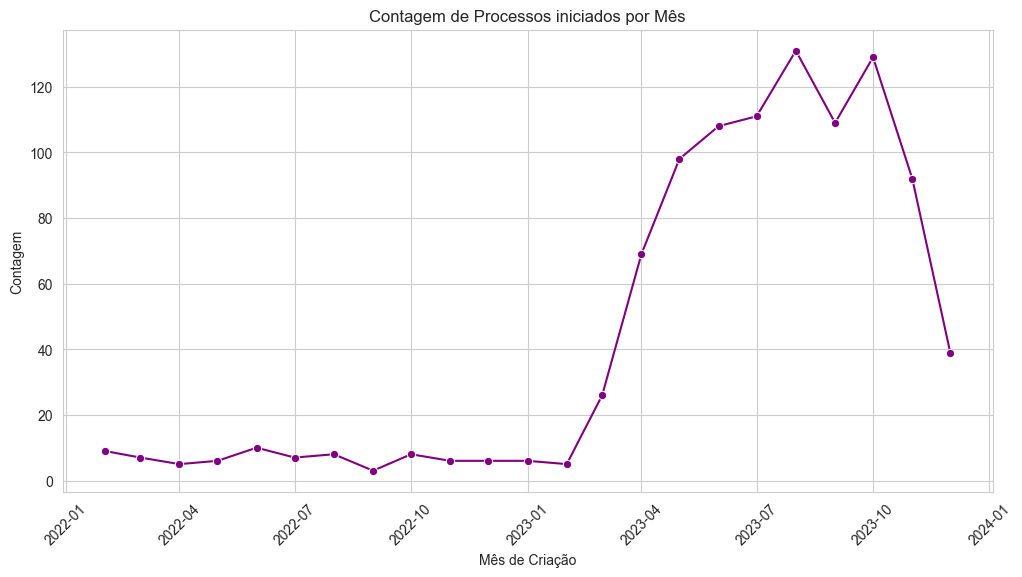

In [724]:
# Substituir 'oficina_df' pelo novo nome do meu dataset 'contagem_datas'
contagem_datas = oficina_df['data_criacao'].value_counts().reset_index()

# Extrair o mês e o ano
contagem_datas['ano_mes'] = contagem_datas['data_criacao'].dt.to_period('M').dt.to_timestamp()

# Agrupar por mês e somar as contagens
contagem_mensal = contagem_datas.groupby('ano_mes')['count'].sum().reset_index()

#Gráfico de linha da variável 'data_criacao'
plt.figure(figsize = (12, 6))
sns.lineplot(data = contagem_mensal, x = 'ano_mes', y = 'count', marker  ='o', color = 'purple')
plt.title('Contagem de Processos iniciados por Mês')
plt.xlabel('Mês de Criação')
plt.ylabel('Contagem')
plt.xticks(rotation = 45)
plt.show()

**Notas:**

Os número de processos iniciados do dataset é de 998, tendo datas de início compreendidas entre o dia 23 de fevereiro de 2022 e o dia 22 de dezembro de 2023.

Através do gráfico podemos observar que a partir de finais de março de 2023 o número de processos inicializados por mês aumentou significativamente, mantendo-se em valores acima dos 80 processos por mês até outubro de 2023.

---

#### 4.1.2. Variável 'marca'

In [725]:
oficina_df[['marca']].describe()

,marca
count,998
unique,31
top,Peugeot
freq,184


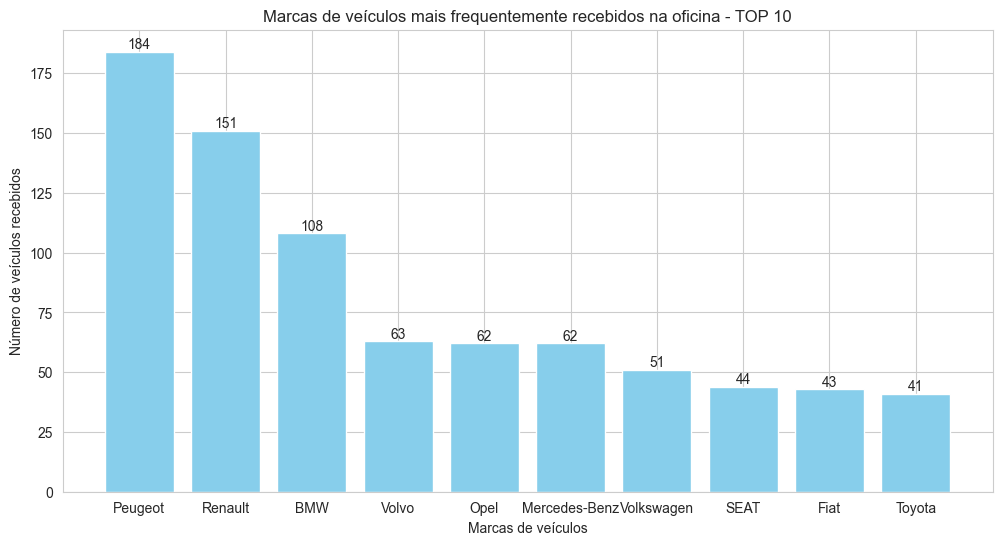

In [726]:
# Agrupar por mês e somar as contagens
contagem_marca_top10 = oficina_df['marca'].value_counts().head(10)

#Bar chart das marcas dos veículos dos processos
plt.figure(figsize=(12, 6))
bars = plt.bar(contagem_marca_top10.index, contagem_marca_top10.values, color = 'skyblue')
plt.title('Marcas de veículos mais frequentemente recebidos na oficina - TOP 10')
plt.xlabel('Marcas de veículos')
plt.ylabel('Número de veículos recebidos')

# Adicionar valor do número de veículos de determinada marca
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha = 'center', va = 'bottom')

plt.show()

**Notas:**

Dos 998 processos do dataset, temos veículos de 31 marcas diferentes.

A marca de veículos mais frequentemente recebida na oficina no período definido é a 'Peugeot' com 184 veículos, seguido da marca 'Renault' com 151 veículos, e em terceiro lugar a marca 'BMW' com 108 veículos.

O número de veículos das marcas 'Volvo', 'Opel', 'Mercedez-Benz', 'Volkswagen', 'SEAT', 'Fiat' e 'Toyota' é bastante idêntico entre si, rondando valores entre 41 e 63 veículos.

A partir do gráfico podemos concluir que há uma marcada prevalência de veículos das marcas 'Peugeot', 'Renault' e 'BMW'. Tendo em conta essa prevalência, poderiamos fazer um estudo mais aprofundado se a oficina beneficiaria ter uma atenção especial para especificidades de peças, reparações de chapa e materiais de pintura, destas 3 marcas.

---

#### 4.1.3. Variável 'modelo'

In [727]:
oficina_df[['modelo']].describe() 

,modelo
count,998
unique,162
top,Megane
freq,61


In [728]:
#Top 10 de modelos mais recebidos nas oficinas
modelo_top10 = oficina_df['modelo'].value_counts().head(10)

marcas = ['Renault', 'Peugeot', 'Fiat', 'Renault', 'SEAT', 'Nissan', 'Peugeot', 'Peugeot', 'BMW', 'Opel']

df_modelo_top10 = pd.DataFrame({'marca':marcas, 'modelo': modelo_top10.index, 'contagem': modelo_top10.values})
df_modelo_top10

,marca,modelo,contagem
0,Renault,Megane,61
1,Peugeot,308,42
2,Fiat,Tipo,29
3,Renault,Clio,28
4,SEAT,Leon,25
5,Nissan,Qashqai,25
6,Peugeot,208,24
7,Peugeot,508,23
8,BMW,Serie 1,23
9,Opel,Astra,23


<Figure size 1000x600 with 0 Axes>

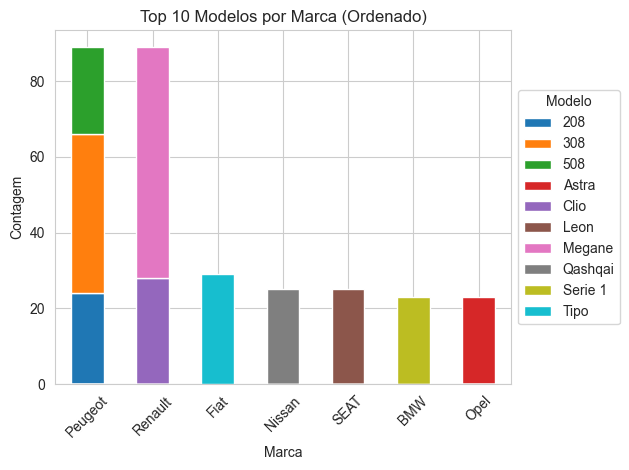

In [729]:
# Calcular a contagem total de modelos para cada marca
contagem_por_marca = df_modelo_top10.groupby('marca')['contagem'].sum()

# Ordenar as marcas com base na contagem total de modelos
marcas_ordenadas = contagem_por_marca.sort_values(ascending=False).index

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
df_modelo_top10.groupby(['marca', 'modelo']).sum()['contagem'].unstack().loc[marcas_ordenadas].plot(kind='bar', stacked=True)
plt.title('Top 10 Modelos por Marca (Ordenado)')
plt.xlabel('Marca')
plt.ylabel('Contagem')
plt.legend(title='Modelo', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Notas:**

No dataset temos 162 modelos de veículos diferentes, sendo o modelo mais frequentemente recebido na oficina o 'Megane', com 61 veículos recebidos, sendo este um modelo da marca 'Renault'. Segue-se o modelo '308' da 'Peugeot'.

Tal como vimos na análise anterior, as marcas mais prevalentes na oficina são a 'Renault', com os modelos 'Megane' e 'Clio', e a 'Peugeot', com os modelos '308', '208' e '508'.

---

#### 4.1.4. Variável 'kms'

In [730]:
oficina_df[['kms']].describe()

,kms
count,998.00
mean,67081.11
std,124298.88
min,0.00
25%,4875.00
50%,48318.50
75%,94059.50
max,3150297.00


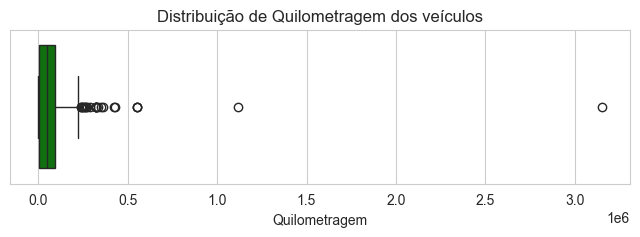

In [731]:
# Criar um boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(data=oficina_df['kms'], color='green', orient='h')
plt.title('Distribuição de Quilometragem dos veículos')
plt.xlabel('Quilometragem')
plt.show()

**Notas:**

A média de quilómetros dos veículos recebidos na oficina é de 6781 kms, havendo uma grande dispersão de valores entre um mínimo de 0 (possivelmente por não se ter registado o seu valor) e um máximo de 3.150.297 km (que me parece ser um valor muito exagerado para um carro), sendo muito provavelmente um outlier, como podemos identificar no boxplot acima.


> **Variável 'kms' - outliers - Estratégia de Imputação**

Tendo em conta a distribuição da varável 'kms' vamos realizar uma *estratégia de imputação* e aos valores outliers vamos igualar o valor da mediana, 48319 kms.

In [732]:
# Identificar outliers
limite_min = 10
limite_max = 500000
outliers_kms = np.where((oficina_df['kms'] < limite_min) | (oficina_df['kms'] > limite_max))[0]
print("Outliers de kms:")
print(outliers_kms)

# Substituindo os valores dos outliers pelo valor desejado
for i in oficina_df['kms'].index:
    if i in outliers_kms:
        oficina_df.loc[i, 'kms'] = 48319

Outliers de kms:
[  1   3   4   6   7   8   9  10  11  13  19  20  30  33  35  36  37  38
  40  46  47  48  49  53  54  55  57  64  67  68  71  75  76  78  88  89
  90  91  92  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 116 117 149 173 174 189 214 215 255 274 275 276
 277 278 279 280 281 282 284 285 286 287 288 291 292 300 306 309 310 316
 318 325 333 338 339 346 357 369 375 377 382 383 384 386 387 390 391 392
 397 398 399 400 401 402 403 404 405 406 408 409 433 435 447 451 459 461
 462 463 464 465 466 467 490 499 522 532 533 535 541 542 543 544 545 548
 554 558 561 562 563 564 574 575 578 585 590 592 593 594 595 597 598 599
 600 601 602 605 606 607 608 610 615 616 617 618 619 620 621 622 623 624
 625 626 627 628 629 630 631 632 633 634 635 638 639 640 641 642 643 644
 645 646 647 655 656 691 698 722 761 779 780 781 782 784 785 786 787 789
 790 791 792 841 878 941 942 943 947 976 986 987 992 993 994]


In [733]:
outliers_kms.shape

(231,)

In [734]:
oficina_df[['kms']].describe()

,kms
count,998.00
mean,66096.33
std,122358.02
min,0.00
25%,5131.75
50%,48319.00
75%,93742.25
max,3150297.00


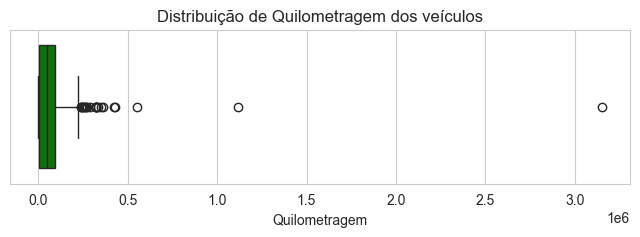

In [735]:
# Criar um boxplot depois de removidos os outliers
plt.figure(figsize=(8, 2))
sns.boxplot(data = oficina_df['kms'], color ='green', orient='h')
plt.title('Distribuição de Quilometragem dos veículos')
plt.xlabel('Quilometragem')
plt.show()

**Notas:**

Após substituirmos os 231 valores outliers de kms, temos um média um pouco mais elevada (72329 kms), o desvio padrão já tem um valor bem menor e mais aceitável, e 50% da quilometragem dos veículos compreende-se entre 45318 e 92812 kms.

---

---

### 4.2. Análise Exploratória utilizando sub-dataset do original

#### 4.2.1. Análise de veículos imobilizados - tempos espera entre início do processo e real início reparação

> Nesta seção apenas me vou focar nos veículos imobilizados, porque estes tempos de espera são especialmente lesivos para a oficina, uma vez que ocupa espaço nesta.

> Os tempos de espera neste período para os veículos não imobilizados apenas teriam interesse para uma análise feita para a seguradora.

In [736]:
#Criar subdataset com informação sobre os veículos imobilizados
oficina_df_rebocados = oficina_df[['imobilizado', 'data_reboque']]
oficina_df_rebocados = oficina_df_rebocados[oficina_df_rebocados['imobilizado'] == 'Sim']
oficina_df_rebocados

,imobilizado,data_reboque
id,,
4204,Sim,2023-12-21
4179,Sim,2023-12-19
4109,Sim,2023-12-11
4027,Sim,2023-11-27
3997,Sim,2023-11-22
...,...,...
373,Sim,2022-02-22
370,Sim,2022-02-24
4064,Sim,2023-11-30


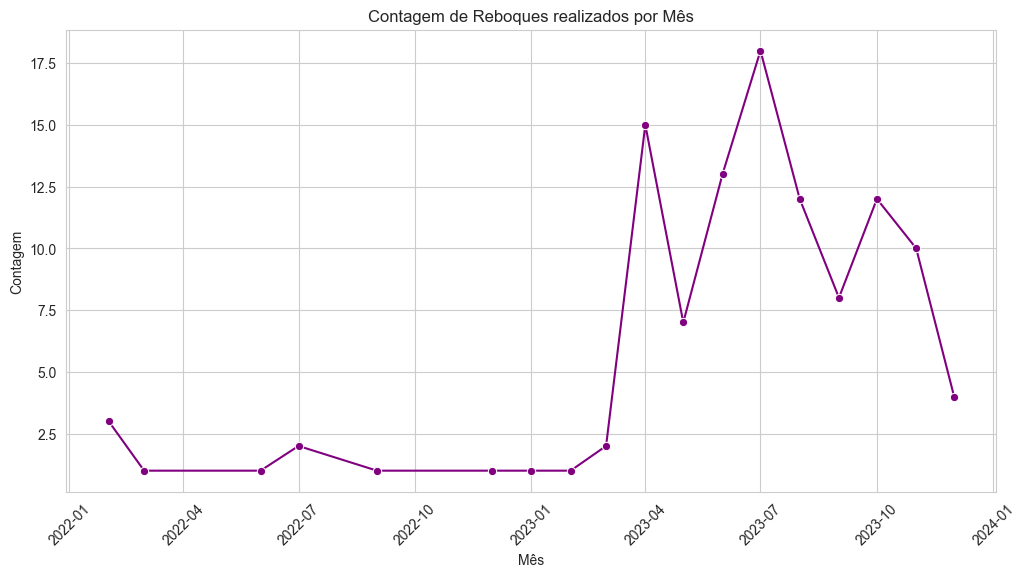

In [737]:
# Substituir 'oficina_df' pelo novo nome do meu dataset 'contagem_datas'
contagem_datas_rebocados = oficina_df['data_reboque'].value_counts().reset_index()

# Extrair o mês e o ano
contagem_datas_rebocados['ano_mes'] = contagem_datas_rebocados['data_reboque'].dt.to_period('M').dt.to_timestamp()

# Agrupar por mês e somar as contagens
contagem_mensal_rebocados = contagem_datas_rebocados.groupby('ano_mes')['count'].sum().reset_index()

#Gráfico de linha da variável 'data_criacao'
plt.figure(figsize=(12, 6))
sns.lineplot(data=contagem_mensal_rebocados, x='ano_mes', y='count', marker='o', color = 'purple')
plt.title('Contagem de Reboques realizados por Mês')
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

**Nota:**

Podemos concluir que temos 112 veículos que ficaram imobilizados e necessitaram de reboque.

Verificamos ainda pelo gráfico que a maioria dos reboques se concentra entre maio e dezembro de 2023 (período idêntico à concentração de maior número de processos iniciados na oficina, já observado anteriormente).

In [738]:
#Complementar o subdataset com informação sobre os veículos imobilizados com mais variáveis calculadas
oficina_df_rebocados.loc[:, 'dias_ate_peritagem_rebocados'] = (oficina_df['data_peritagem'] - oficina_df['data_criacao']).dt.days
oficina_df_rebocados.loc[:, 'dias_peritagem_autorizacao_rebocados'] = (oficina_df['autoriz_repar'] - oficina_df['data_peritagem']).dt.days
oficina_df_rebocados.loc[:, 'dias_autoriz_agendamento_rebocados'] = (oficina_df['agendamento_repar'] - oficina_df['autoriz_repar']).dt.days
oficina_df_rebocados.loc[:, 'dias_agendamento_inicio_rep_rebocados'] = (oficina_df['data_real_inicio_repar'] - oficina_df['agendamento_repar']).dt.days
oficina_df_rebocados.loc[:, 'total_dias_espera'] = (oficina_df['data_real_inicio_repar'] - oficina_df['data_criacao']).dt.days
oficina_df_rebocados

,imobilizado,data_reboque,dias_ate_peritagem_rebocados,dias_peritagem_autorizacao_rebocados,dias_autoriz_agendamento_rebocados,dias_agendamento_inicio_rep_rebocados,total_dias_espera
id,,,,,,,
4204,Sim,2023-12-21,6,1,5,0,12
4179,Sim,2023-12-19,2,1,5,0,8
4109,Sim,2023-12-11,1,0,2,0,3
4027,Sim,2023-11-27,7,0,2,0,9
3997,Sim,2023-11-22,1,13,2,7,23
...,...,...,...,...,...,...,...
373,Sim,2022-02-22,1,13,2,0,16
370,Sim,2022-02-24,1,1,6,0,8
4064,Sim,2023-11-30,7,8,2,0,17


In [739]:
#Visão geral das distribuições das variáveis criadas
pd.set_option('display.float_format', '{:.0f}'.format)
oficina_df_rebocados.describe().map(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)

,data_reboque,dias_ate_peritagem_rebocados,dias_peritagem_autorizacao_rebocados,dias_autoriz_agendamento_rebocados,dias_agendamento_inicio_rep_rebocados,total_dias_espera
count,112,112,112,112,112,112
mean,2023-06-22,4,8,3,-0,15
min,2022-02-22,0,0,0,-9,2
25%,2023-05-01,1,1,2,0,7
50%,2023-07-18,2,5,2,0,11
75%,2023-09-25,4,10,4,0,17
max,2023-12-21,41,54,70,7,97
std,NaN,6,10,7,1,14


In [740]:
#Moda das variáveis criadas
oficina_df_rebocados[['dias_ate_peritagem_rebocados', 'dias_peritagem_autorizacao_rebocados', 'dias_autoriz_agendamento_rebocados', 'total_dias_espera']].mode()

,dias_ate_peritagem_rebocados,dias_peritagem_autorizacao_rebocados,dias_autoriz_agendamento_rebocados,total_dias_espera
0,1,1,2,6
1,NaN,NaN,NaN,7


In [741]:
#Veículos com data de agendamento muito posterior à data de autorização da reparação (o 9 resulta da mediana + desvio padrão)
oficina_df_rebocados[oficina_df_rebocados['dias_autoriz_agendamento_rebocados'] > 9]

,imobilizado,data_reboque,dias_ate_peritagem_rebocados,dias_peritagem_autorizacao_rebocados,dias_autoriz_agendamento_rebocados,dias_agendamento_inicio_rep_rebocados,total_dias_espera
id,,,,,,,
3256,Sim,2023-10-13,0,1,70,0,71
2970,Sim,2023-07-07,0,2,20,0,22


In [742]:
#Veículos com data de início real da reparação anterior à data de agendamento ( explicação nas notas)
oficina_df_rebocados[oficina_df_rebocados['dias_agendamento_inicio_rep_rebocados'] < 0]

,imobilizado,data_reboque,dias_ate_peritagem_rebocados,dias_peritagem_autorizacao_rebocados,dias_autoriz_agendamento_rebocados,dias_agendamento_inicio_rep_rebocados,total_dias_espera
id,,,,,,,
3188,Sim,2023-07-31,1,7,2,-1,9
3066,Sim,2023-07-12,1,46,0,-4,43
3149,Sim,2023-07-25,1,13,0,-4,10
2758,Sim,2023-05-22,4,7,0,-5,6
1087,Sim,2022-07-21,2,41,0,-9,34
952,Sim,2022-06-27,2,1,4,-4,3
3955,Sim,2023-12-11,12,14,2,-1,27


In [743]:
#Veículos com data de início real da reparação posterior à data de agendamento ( explicação nas notas)
oficina_df_rebocados[oficina_df_rebocados['dias_agendamento_inicio_rep_rebocados'] > 0]

,imobilizado,data_reboque,dias_ate_peritagem_rebocados,dias_peritagem_autorizacao_rebocados,dias_autoriz_agendamento_rebocados,dias_agendamento_inicio_rep_rebocados,total_dias_espera
id,,,,,,,
3997,Sim,2023-11-22,1,13,2,7,23
3702,Sim,2023-10-17,2,11,3,1,17
3570,Sim,2023-09-22,3,8,3,3,17


In [744]:
#Veículos com dias totais de espera muito superiores (o 43 resulta da mediana + 2 * desvio padrão)
oficina_df_rebocados[oficina_df_rebocados['total_dias_espera'] > 43]

,imobilizado,data_reboque,dias_ate_peritagem_rebocados,dias_peritagem_autorizacao_rebocados,dias_autoriz_agendamento_rebocados,dias_agendamento_inicio_rep_rebocados,total_dias_espera
id,,,,,,,
3258,Sim,2023-08-09,41,52,4,0,97
3256,Sim,2023-10-13,0,1,70,0,71
3172,Sim,2023-07-27,20,34,2,0,56
2361,Sim,2023-05-11,22,54,2,0,78


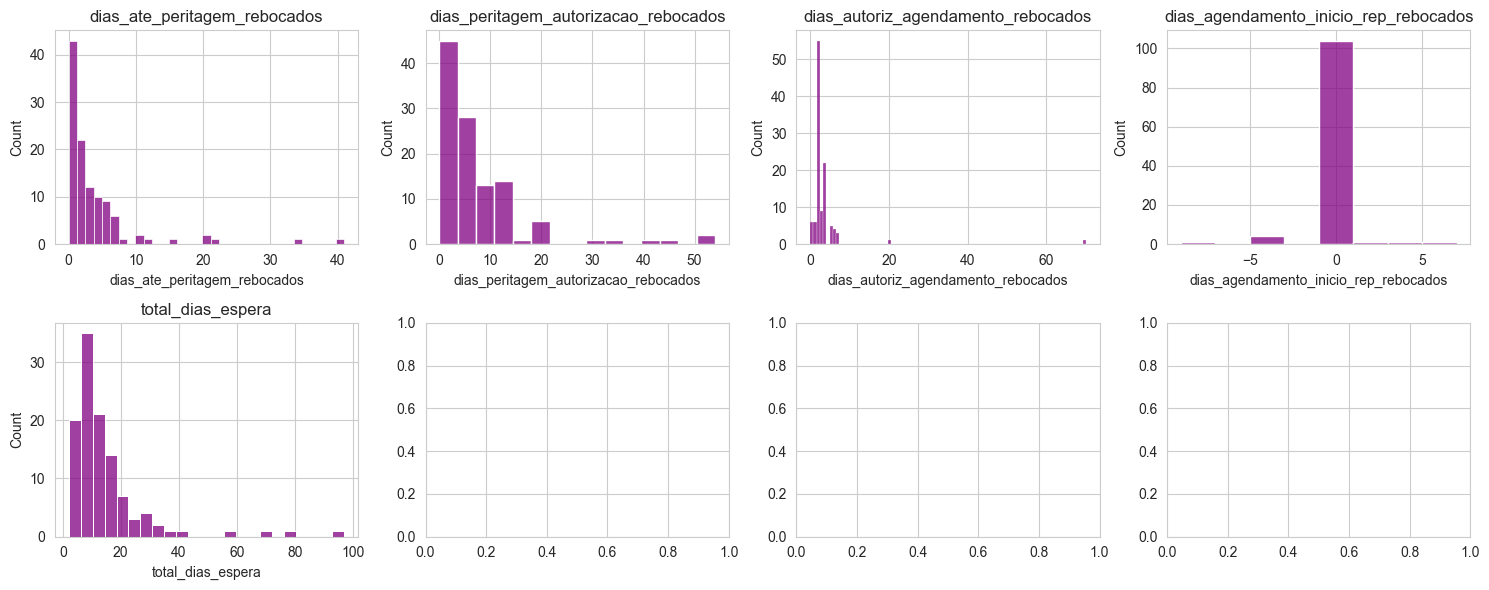

In [745]:
#Histogramas para avaliarmos distribuições
variáveis = ['dias_ate_peritagem_rebocados', 'dias_peritagem_autorizacao_rebocados', 
           'dias_autoriz_agendamento_rebocados', 'dias_agendamento_inicio_rep_rebocados', 
           'total_dias_espera']

num_linhas = 2
num_variáveis = 4

fig, axes = plt.subplots(nrows=num_linhas, ncols=num_variáveis, figsize=(15,6))

for i, variavel in enumerate(variáveis):
    linha = i // num_variáveis
    variavel_subplot = i % num_variáveis
    sns.histplot(data=oficina_df_rebocados, x=variavel, ax=axes[linha, variavel_subplot], color = 'purple')
    axes[linha, variavel_subplot].set_title(variavel)

plt.tight_layout()
plt.show()

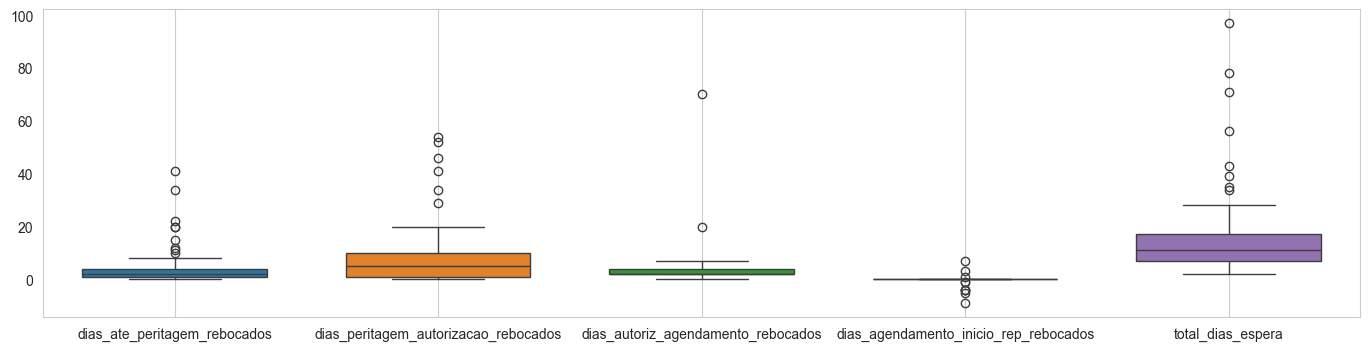

In [746]:
#Boxplot para conseguirmos identificar outliers
plt.figure(figsize=(17, 4))
sns.boxplot(data=oficina_df_rebocados, width=0.7)
plt.grid()
plt.show()

**Nota:**

Ao sub-dataset 'oficina_df_rebocados' acrescentei as variávels 'dias_ate_peritagem_rebocados', 'dias_peritagem_autorizacao_rebocados', 'dias_autoriz_agendamento_rebocados' e 'total_dias_espera' calculadas a partir da data de reboque e das datas correspondentes (data peritagem,  de autorização de reparação,  de agendamento de reparação e de início real de reparação, respectivamente). Desta forma, consigo avaliar o tempo que um veículo fica imobilizado ("a ocupar espaço", uma vez que se tratam de veículos imobilizados na oficina) e ter uma noção de eficiência ou não do processo realizado pela seguradora.

Podemos verificar que em média um veículo imobilizado fica:
* 4 dias à espera para ser feita a peritagem;
* 8 dias até autorização de reparação após peritagem;
* 3 dias até agendamento após autorização de reparação;
* 0 dias desde a data de reboque até ao início real de reparação deste.

Com esta análise podemos concluir que os veículos imobilizados trazidos por reboque tem uma despesa extra essencialmente de ocupação do espaço em oficina (que pode ser limitado), bastante marcada uma vez que em média são carros que estão na oficina 15 dias sem se puder ter qualquer ação sobre eles.
Todos estes casos devem ser estudados com pormenor para se perceber se a oficina pode mudar algo para reduzir estes tempos de espera.

Pelos gráficos dos histogramas podemos concluir que:
> * Um número reduzido de veículos demorou mais de 10 dias para ter a sua peritagem realizada.
> * 50% dos veículos imobilizados aguardou 2 dias ou menos para realizar a peritagem, sendo o valor mais frequente de 1 dia (moda).

> * Também um número reduzido de veículos demorou mais de 20 dias desde a peritagem até a autorização de reparação.
> * 50% dos veículos imobilizados aguardou 5 dias ou menos para ter a sua reparação autorizada após peritagem, sendo o valor mais frequente de 1 dia (moda).

> * Os dias de espera entre a autorização e agendamento da reparação, são relativamente mais curtos, cerca de 3 dias, com cerca de 75% destes abaixo dos 4 dias.
> * No período de espera entre a autorização e agendamento da reparação, temos 2 valores discrepantes, que podiam ser considerados outliers. Mas muito provavelmente tratam-se de veículos que estiveram durante um período de tempo em estado de autorização 'condicional'. Ou seja, veículos em que a reparação teve que ser iníciada antes da autorização, no sentido de avaliar os danos no veículo em zonas mais internas deste. Houve necessidade de aceder ao interior do veículo, por parte da oficina, para nova peritagem interna e autorização definitiva da reparação.

> * Os veículos, por norma, iniciaram a sua reparação efetivamente no dia agendado para tal, uma vez que temos uma média de 0 e uma terceiro quartilde também com um valor de 0.
> * Existem contudo 7 veículos com dias de espera negativos na variável 'dias_agendamento_inicio_rep_rebocados', o que pode ser justificado também, como, já referi anteriormente, por ter havido veículos que iniciaram a sua 'reparação' apenas para a peritagem conseguir concluir e proceder à autorização.
> * Existem 3 casos de veículos que não iniciaram a sua reparação na data prevista, data de agendamento. Estas observações podem ser justificadas por muitas coisas, entre elas, por falta de algum profissional para iniciar a reparação, falta de peças ou materiais de pintura, muito trabalho nessa semana ou dia, etc.

> * A grande maioria dos veículos imobilizados (75% destes) no total, desde a criação do processo até ao início da sua efetiva reparação não aguardou mais que 17 dias.
> * Existem contudo 4 veículos com dias de espera totais muito superiores (maiores que 43 dias) que devem ser situações pontuais que teriam que ser averiguadas, uma vez que levou a custos elevados por ter o veículo na oficina sem o puder reparar.
> * 3 desses veículos aguardaram mais tempo por questões de peritagem e autorização (como podemos verificar na célula 153) que já comentei anteriormente.
> * A observação mais intrigante é o veículo de index 294, no qual a peritagem foi feita no mesmo dia de início da criação do processo, a autorização após um dia, e o seu agendamento (coincide com a data real de início de reparação) realizado apenas para 70 dias após autorização. Haverá uma justificação para tal, que deve ser encontrada para avaliação do sucedido. Poderá hipoteticamente dever-se há longa espera de alguma peça específica para a reparação em si.

---

#### 4.2.2. Análise de veículos - tempo de espera entre agendamento e real início de reparação

> Neste momento da minha análise vou dedicar-me a avaliar a eficiência da oficina em agendar uma reparação. Ou seja, se cumpre as datas combinadas com o cliente ou não.
Como já o fiz para os veículos rebocados anteriormente, não os vou incluir neste sub_datase.

In [747]:
#Criação de novo sub-set com veículos não imobilizados
oficina_df_agendamento = oficina_df[['agendamento_repar', 'data_real_inicio_repar', 'imobilizado']]
oficina_df_agendamento = oficina_df_agendamento[oficina_df_agendamento['imobilizado'] == 'Não']
oficina_df_agendamento.drop('imobilizado', axis = 1, inplace = True)
oficina_df_agendamento

,agendamento_repar,data_real_inicio_repar
id,,
3647,2023-10-26,2023-10-26
3536,2023-11-07,2023-11-07
635,2022-04-27,2022-04-27
3766,2023-11-16,2023-11-16
2675,2023-05-08,2023-05-08
...,...,...
3932,2023-12-12,2023-12-12
3943,2023-12-20,2023-12-20
3843,2023-11-17,2023-11-17


In [748]:
#Criar nova variável 'dias_agendamento_inicio_repar' no sub-dataset oficina_df_agendamento
oficina_df_agendamento.loc[:, 'dias_agendamento_inicio_repar'] = (oficina_df_agendamento['data_real_inicio_repar'] - oficina_df_agendamento['agendamento_repar']).dt.days
oficina_df_agendamento

,agendamento_repar,data_real_inicio_repar,dias_agendamento_inicio_repar
id,,,
3647,2023-10-26,2023-10-26,0
3536,2023-11-07,2023-11-07,0
635,2022-04-27,2022-04-27,0
3766,2023-11-16,2023-11-16,0
2675,2023-05-08,2023-05-08,0
...,...,...,...
3932,2023-12-12,2023-12-12,0
3943,2023-12-20,2023-12-20,0
3843,2023-11-17,2023-11-17,0


In [749]:
oficina_df_agendamento.describe().map(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)

,agendamento_repar,data_real_inicio_repar,dias_agendamento_inicio_repar
count,886,886,886
mean,2023-08-16,2023-08-16,0
min,2022-03-28,2022-03-28,-5
25%,2023-06-29,2023-06-29,0
50%,2023-09-14,2023-09-14,0
75%,2023-11-15,2023-11-15,0
max,2024-01-18,2024-01-18,3
std,NaN,NaN,0


In [750]:
#Veículos com data de início real da reparação anterior à data de agendamento (explicação nas notas)
oficina_df_agendamento[oficina_df_agendamento['dias_agendamento_inicio_repar'] < 0]

,agendamento_repar,data_real_inicio_repar,dias_agendamento_inicio_repar
id,,,
908,2022-06-23,2022-06-22,-1
3630,2023-10-20,2023-10-19,-1
943,2022-07-05,2022-06-30,-5
3444,2023-10-03,2023-10-02,-1
2996,2023-07-19,2023-07-14,-5
2693,2023-06-01,2023-05-31,-1


In [751]:
#Veículos com data de início real da reparação posterior à data de agendamento (explicação nas notas)
oficina_df_agendamento[oficina_df_agendamento['dias_agendamento_inicio_repar'] > 0]

,agendamento_repar,data_real_inicio_repar,dias_agendamento_inicio_repar
id,,,
4011,2023-12-20,2023-12-21,1
518,2022-04-12,2022-04-14,2
3952,2023-12-14,2023-12-15,1
3394,2023-10-11,2023-10-12,1
3871,2023-12-11,2023-12-12,1
998,2022-07-08,2022-07-11,3
3987,2023-12-15,2023-12-18,3
3991,2023-12-13,2023-12-14,1
3985,2023-12-19,2023-12-20,1


**Notas:**

Neste sub-dataset temos a contabilização do número de dias de atraso, ou não, entre a data de agendamento  e a data de real início da reparação de veículos não imobilizados. Podemos observar que:
* A grande maioria dos veículos cumprem a data de agendamento e iniciam, efetivamente, a sua reparação no dia agendado para tal, uma vez que temos uma média de 0 e uma terceiro quartilde também tem um valor de 0.
* Existem contudo 6 veículos com dias de espera negativos na variável 'dias_agendamento_inicio_repar', o que pode ser justificado também, como, já referi anteriormente, por ter havido veículos que iniciaram a sua 'reparação' apenas para a peritagem conseguir concluir e proceder à sua autorização.
* Existem ainda 13 casos de veículos que não iniciaram a sua reparação na data prevista, data de agendamento. Estas observações podem ser justificadas por questões internas da oficina já explicadas anteriormente, mas também por não comparecimento dos clientes com os veículos para reparação ou de re-agendamento. São situações que teremos que averiguar com a oficina para saber a sua justificação e avaliar consoante ela.

Contudo podemos concluir que a oficina no geral é bastante eficiente a agendar uma reparação de um veículo e a cumprir essa compromisso.

---

#### 4.2.3. Análise orçamentos de reparação de veículos

> Neste capítulo vou dedicar-me a avaliar os orçamentos previstos para reparar um veículo.

> A partir daqui na minha análise vou incluir todos os veículos do dataset original.

In [752]:
#Criar sub-dataset com as variáveis relacionadas com os orçamentos
oficina_df_orc_repar = oficina_df[['marca', 'orc_mo_chapa', 'orc_mo_pintura', 'orc_mat_pintura', 'orc_mat_comp', 'orc_pecas']]
oficina_df_orc_repar.head()

,marca,orc_mo_chapa,orc_mo_pintura,orc_mat_pintura,orc_mat_comp,orc_pecas
id,,,,,,
3647,Citroen,0,0,0,0,0
3536,Peugeot,0,0,0,0,0
635,Fiat,0,0,0,0,0
3766,Nissan,160,76,18,0,0
2675,BMW,556,725,414,0,0


In [753]:
#Criar novas variáveis 'orc_total_mo', 'orc_mat' e 'orc_total' no sub-dataset oficina_df_orc_repar
oficina_df_orc_repar.loc[:, 'orc_total_mo'] = oficina_df_orc_repar[['orc_mo_chapa', 'orc_mo_pintura']].sum(axis=1).copy()
oficina_df_orc_repar.loc[:, 'orc_total_mat'] = oficina_df_orc_repar[['orc_mat_pintura', 'orc_mat_comp']].sum(axis=1).copy()
oficina_df_orc_repar.loc[:, 'orc_total'] = oficina_df_orc_repar[['orc_mo_chapa', 'orc_mo_pintura', 'orc_mat_pintura', 'orc_mat_comp', 'orc_pecas']].sum(axis=1).copy()
oficina_df_orc_repar

C:\Users\Computador2\AppData\Local\Temp\ipykernel_16696\3956346204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oficina_df_orc_repar.loc[:, 'orc_total_mo'] = oficina_df_orc_repar[['orc_mo_chapa', 'orc_mo_pintura']].sum(axis=1).copy()
C:\Users\Computador2\AppData\Local\Temp\ipykernel_16696\3956346204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oficina_df_orc_repar.loc[:, 'orc_total_mat'] = oficina_df_orc_repar[['orc_mat_pintura', 'orc_mat_comp']].sum(axis=1).copy()
C:\Users\Computador2\AppData

,marca,orc_mo_chapa,orc_mo_pintura,orc_mat_pintura,orc_mat_comp,orc_pecas,orc_total_mo,orc_total_mat,orc_total
id,,,,,,,,,
3647,Citroen,0,0,0,0,0,0,0,0
3536,Peugeot,0,0,0,0,0,0,0,0
635,Fiat,0,0,0,0,0,0,0,0
3766,Nissan,160,76,18,0,0,235,18,253
2675,BMW,556,725,414,0,0,1281,414,1695
...,...,...,...,...,...,...,...,...,...
3932,Peugeot,146,0,0,0,466,146,0,613
3943,Peugeot,107,0,0,0,656,107,0,763
3843,SEAT,10,0,0,0,69,10,0,79


In [754]:
oficina_df_orc_repar.describe()

,orc_mo_chapa,orc_mo_pintura,orc_mat_pintura,orc_mat_comp,orc_pecas,orc_total_mo,orc_total_mat,orc_total
count,998,998,998,998,998,998,998,998
mean,448,195,112,1,741,643,113,1497
std,1081,133,81,4,1037,1123,82,1693
min,0,0,0,0,0,0,0,0
25%,161,120,70,0,96,287,71,640
50%,295,170,91,0,376,469,91,1061
75%,550,253,137,0,920,805,138,1800
max,32281,1034,721,67,10322,32510,721,34043


**Nota:**

A média do orçamento total de reparação nesta oficina é de 1497€ por veículo. O valor mais alto orçamentado é 34.043€.
Também podemos aferir que 50% dos orçamentos totais compreendem valores entre 640€ e os 1800€.

A média de orçamentos para peças é de 741€, para mão de obra total é de 643€, e para materiais total é de 113€. Isto permite-me concluir, que de uma forma geral o valor das peças num orçamento a par com a mão de obra total, configuram o grande 'bolo' do orçamento total da reparação, com pesos muito próximos dos 50% do valor total. Contudo isto é apenas uma generalização, havendo casos em os valores de mão de obra são a maioria do orçamento e outros em que o orçamento das peças é a maioria.

De referir que temos valores que fogem muito da média, os designados 'ouliers'. No orçamento das peças temos valores que podem chegar os 10.322€ e no caso do orçamento total de mão de obra, a valores ainda maiores de 32.510€.

Tendo em conta tudo isto, podemos também referir que para a oficina o ideal será 'investir' o nosso cuidado de análise e melhoramento na parte de mão de obra, uma vez que é onde a oficina pode ter mais margem de lucro. No caso das peças e materiais necessários à reparação, as margens lucro serão sempre reduzidas por mais negociação que haja com os fornecedores.

In [755]:
#Veículos com orçamentos totais a zero
oficina_df_orc_repar[oficina_df_orc_repar['orc_total'] == 0]

,marca,orc_mo_chapa,orc_mo_pintura,orc_mat_pintura,orc_mat_comp,orc_pecas,orc_total_mo,orc_total_mat,orc_total
id,,,,,,,,,
3647,Citroen,0,0,0,0,0,0,0,0
3536,Peugeot,0,0,0,0,0,0,0,0
635,Fiat,0,0,0,0,0,0,0,0
943,Renault,0,0,0,0,0,0,0,0
3659,Toyota,0,0,0,0,0,0,0,0


**Nota:**

Como nota extra, os valores de orçamentos totais a zero podem ser justificados por casos de veículos que já teriam realizado anteriormente a sua reparação e por alguma falha humana, problema nas peças ou outra causas, o veículo teve que voltar à oficina para resolver essa situação e não foi orçamentado nenhum valor.

Contudo estas 5 situações devem ser identificadas e apuradas, para termos a certeza que não se tratam de falhas de orçamentação.

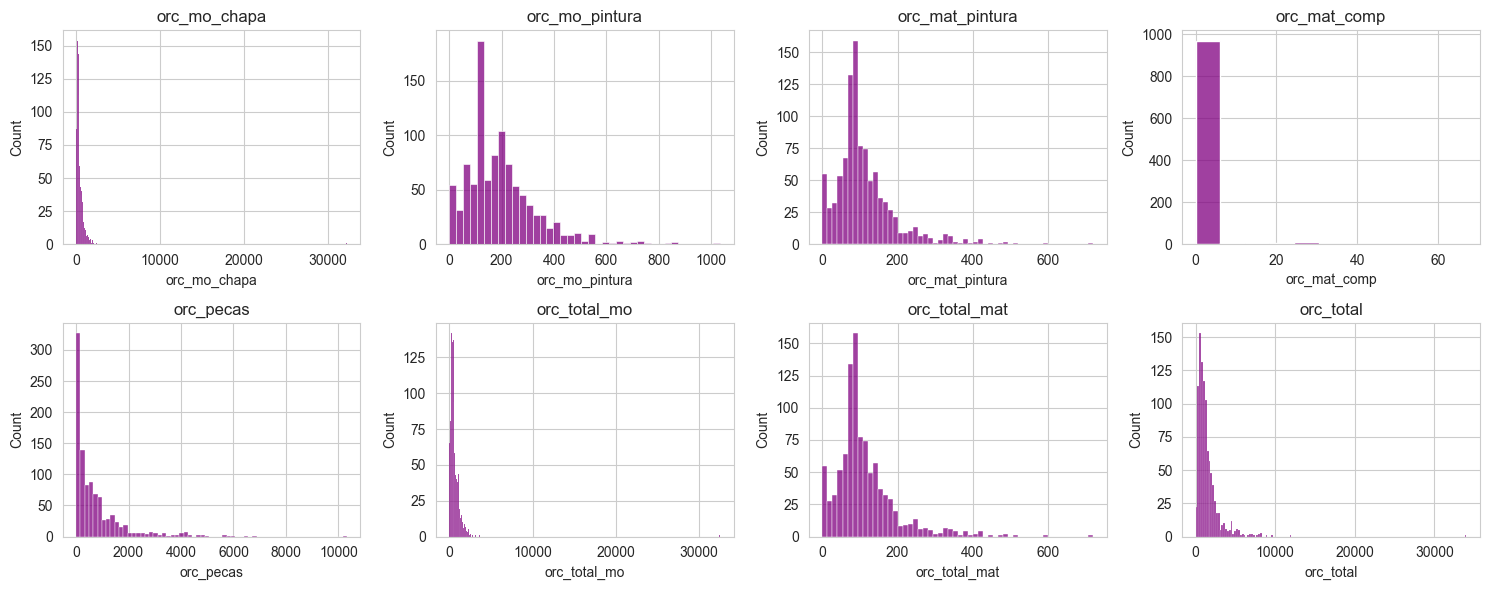

In [756]:
#Histogramas para avaliarmos distribuições
variaveis_orc = ['orc_mo_chapa', 'orc_mo_pintura', 'orc_mat_pintura', 'orc_mat_comp', 'orc_pecas',
             'orc_total_mo', 'orc_total_mat', 'orc_total']

num_linhas_orc = 2
num_variaveis_orc = 4

fig, axes = plt.subplots(nrows=num_linhas_orc, ncols=num_variaveis_orc, figsize=(15,6))

for i, variavel in enumerate(variaveis_orc):
    linha = i // num_variaveis_orc
    variavel_subplot = i % num_variaveis_orc
    sns.histplot(data=oficina_df_orc_repar, x=variavel, ax=axes[linha, variavel_subplot], color = 'purple')
    axes[linha, variavel_subplot].set_title(variavel)

plt.tight_layout()
plt.show()

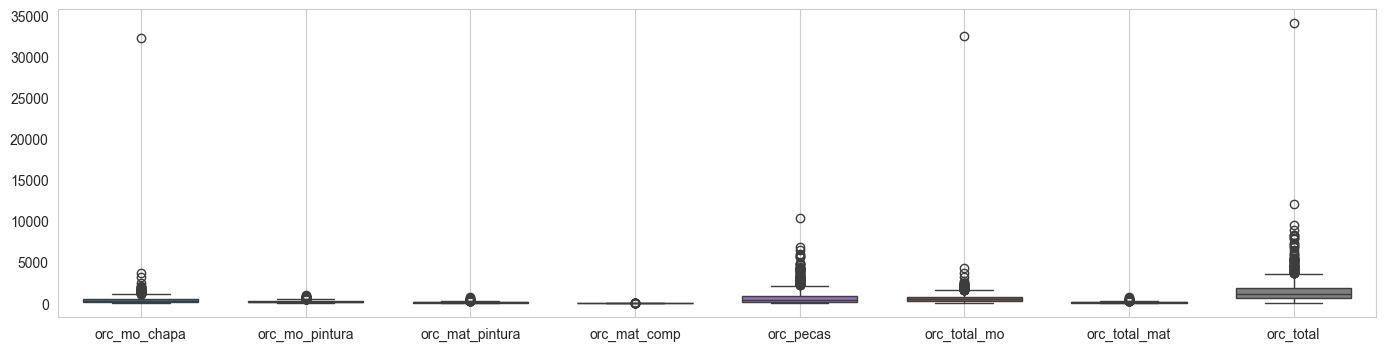

In [757]:
#Boxplot para conseguirmos identificar outliers
plt.figure(figsize=(17, 4))
sns.boxplot(data=oficina_df_orc_repar, width=0.7)
plt.grid()
plt.show()

In [758]:
#Veículos com orçamentos totais a zero
oficina_df_orc_repar[oficina_df_orc_repar['orc_mo_chapa'] > 2000]

,marca,orc_mo_chapa,orc_mo_pintura,orc_mat_pintura,orc_mat_comp,orc_pecas,orc_total_mo,orc_total_mat,orc_total
id,,,,,,,,,
3809,Peugeot,3228,414,334,0,4259,3642,334,8235
3518,Peugeot,2070,647,403,0,6436,2716,403,9555
3332,Toyota,3675,646,358,0,4246,4321,358,8926
2838,Mercedes-Benz,2475,646,486,0,4291,3121,486,7898
2518,Mercedes-Benz,32281,229,170,0,1362,32510,170,34043


**Nota:**

Nos gráficos confirmamos o que foi dito anteriormente, de referir que:
* os histogramas de 'orc_mo_pintura', 'orc_mat_pintura' e logicamente o 'orc_total_pintura' apresentam distribuições próximas da distribuição normal.
* existe um outlier, um valor muito elevado na orçamentação de mãos de obra para chapa de um veículo que se mantém presente, e logicamente, aparece também no 'orc_total_mo' e 'orc_total'.

> Podemos ver que temos um veículo Mercedes-Benz, de index 961, em que a pintura teve orçamentos moderados, comparativamente ao valor elevado de mão de obra necessária para reparar a chapa do veículo, contudo teve um valor muito elevado no orçamento de mão de obra de chapa.

> Vamos averiguar melhor os dados deste veículo.

In [759]:
oficina_df.loc[[2518]]

,data_criacao,marca,modelo,kms,data_peritagem,oficina,autoriz_repar,orc_pecas,orc_mo_chapa,orc_mo_pintura,...,data_reboque,agendamento_repar,tempo_repar,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa
id,,,,,,,,,,,,,,,,,,,,,
2518,2023-03-31,Mercedes-Benz,CLA (117),23939,2023-04-04,Carnaxide,2023-04-04,1362,32281,229,...,NaT,2023-05-03,3,2023-05-03,2023-05-04,0,2,1,6,828


**Nota:**

Como podemos observar, esta reparação de index 2518 tem um valor de horas e de valor em euros de orçamento para mão de obra de chapa que parece ser muito pouco provável de ser real. E observando as horas que realmente foram necessárias para mão de obra de chapa (2 horas), muito possivelmente tratar-se-a de algum erro de digitação. Por isso vamos alterar o valor de 'mo_horas_orc_chapa' para o igualar ao 'mao_obra_chapa', e o correspondente 'orc_mo_chapa'. Deste modo não alteramos o peso desta observação errónea no dataset.

Vou alterar este valor no dataset original e neste sub-set que criamos 'oficina_df_orc_repar'.

In [760]:
valor_atualizado_orc_mo_2518 = 2 * oficina_df.loc[2518, 'orc_mo_chapa'] / oficina_df.loc[2518, 'mo_horas_orc_chapa'] 
valor_atualizado_orc_mo_2518

77.99980669791717

In [761]:
oficina_df.loc[2518, 'orc_mo_chapa']

32281.0

In [762]:
#Atualizar valor no dataset original
oficina_df.loc[2518, 'mo_horas_orc_chapa'] = 2
oficina_df.loc[2518, 'orc_mo_chapa'] = valor_atualizado_orc_mo_2518
oficina_df.loc[[2518]]

,data_criacao,marca,modelo,kms,data_peritagem,oficina,autoriz_repar,orc_pecas,orc_mo_chapa,orc_mo_pintura,...,data_reboque,agendamento_repar,tempo_repar,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa
id,,,,,,,,,,,,,,,,,,,,,
2518,2023-03-31,Mercedes-Benz,CLA (117),23939,2023-04-04,Carnaxide,2023-04-04,1362,78,229,...,NaT,2023-05-03,3,2023-05-03,2023-05-04,0,2,1,6,2


In [763]:
#Atualizar valor no sub-dataset 'oficina_df_orc_repar'
oficina_df_orc_repar.loc[2518, 'mo_horas_orc_chapa'] = 2
oficina_df_orc_repar.loc[2518, 'orc_mo_chapa'] = valor_atualizado_orc_mo_2518
oficina_df_orc_repar.loc[2518, 'orc_total_mo'] = oficina_df_orc_repar.loc[2518, 'orc_mo_chapa'] + oficina_df_orc_repar.loc[2518, 'orc_mo_pintura']
oficina_df_orc_repar.loc[2518, 'orc_total'] = oficina_df_orc_repar.loc[2518, 'orc_total_mo'] + oficina_df_orc_repar.loc[2518, 'orc_total_mat']
oficina_df_orc_repar.loc[[2518]]

C:\Users\Computador2\AppData\Local\Temp\ipykernel_16696\87396039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oficina_df_orc_repar.loc[2518, 'mo_horas_orc_chapa'] = 2


,marca,orc_mo_chapa,orc_mo_pintura,orc_mat_pintura,orc_mat_comp,orc_pecas,orc_total_mo,orc_total_mat,orc_total,mo_horas_orc_chapa
id,,,,,,,,,,
2518,Mercedes-Benz,78,229,170,0,1362,307,170,478,2


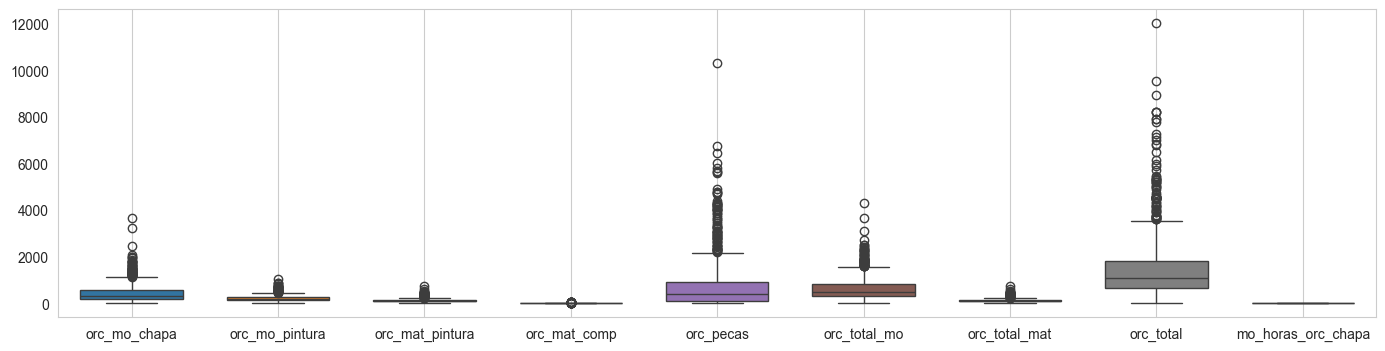

In [764]:
#Novo Boxplot
plt.figure(figsize=(17, 4))
sns.boxplot(data=oficina_df_orc_repar, width=0.7)
plt.grid()
plt.show()

In [765]:
#Sub-dataset mais reduzido, apenas com variáveis totais
oficina_df_orc_repar1 = oficina_df_orc_repar.drop(['orc_mo_chapa', 'orc_mo_pintura', 'orc_mat_pintura', 'orc_mat_comp', 'mo_horas_orc_chapa'], axis = 1)
oficina_df_orc_repar1

,marca,orc_pecas,orc_total_mo,orc_total_mat,orc_total
id,,,,,
3647,Citroen,0,0,0,0
3536,Peugeot,0,0,0,0
635,Fiat,0,0,0,0
3766,Nissan,0,235,18,253
2675,BMW,0,1281,414,1695
...,...,...,...,...,...
3932,Peugeot,466,146,0,613
3943,Peugeot,656,107,0,763
3843,SEAT,69,10,0,79


In [766]:
medias_orc_marca = oficina_df_orc_repar1.groupby('marca').mean()

medias_orc_marca_ordenadas_total = medias_orc_marca.sort_values(by='orc_total', ascending=False)

# Exibir as médias por marca ordenadas forma descendentr por orçamento total de reparação
print("10 Marcas ordenadas com maiores valores de orçamento total da reparação:\n\n {}".format(medias_orc_marca_ordenadas_total.head(10)))

10 Marcas ordenadas com maiores valores de orçamento total da reparação:

                orc_pecas  orc_total_mo  orc_total_mat  orc_total
marca                                                           
Porsche             3282           957            300       4538
Mazda               1510          1232            233       2975
Alfa Romeo          2065           530            122       2717
Skoda               1088           629            112       1830
Nissan               916           772            116       1805
Lexus               1153           529            107       1789
Jeep                1105           546             96       1747
Mercedes-Benz        853           726            129       1686
DS                  1019           522            116       1657
BMW                  809           656            135       1599


In [767]:
medias_orc_marca_ordenadas_pecas = medias_orc_marca.sort_values(by='orc_pecas', ascending=False)

# Exibir as médias por marca ordenadas forma descendentr por orçamento para peças
print("10 Marcas ordenadas com maiores valores de orçamento para peças:\n\n {}".format(medias_orc_marca_ordenadas_pecas.head(10)))

10 Marcas ordenadas com maiores valores de orçamento para peças:

                orc_pecas  orc_total_mo  orc_total_mat  orc_total
marca                                                           
Porsche             3282           957            300       4538
Alfa Romeo          2065           530            122       2717
Mazda               1510          1232            233       2975
Jaguar              1233           287             72       1591
Lexus               1153           529            107       1789
Jeep                1105           546             96       1747
Skoda               1088           629            112       1830
DS                  1019           522            116       1657
Nissan               916           772            116       1805
Mercedes-Benz        853           726            129       1686


In [768]:
medias_orc_marca_ordenadas_mo = medias_orc_marca.sort_values(by='orc_total_mo', ascending=False)

# Exibir as médias por marca ordenadas forma descendentr por orçamento total de mão de obra
print("10 Marcas ordenadas com maiores valores de orçamento para mão de obra:\n\n {}".format(medias_orc_marca_ordenadas_mo.head(10)))

10 Marcas ordenadas com maiores valores de orçamento para mão de obra:

                orc_pecas  orc_total_mo  orc_total_mat  orc_total
marca                                                           
Mazda               1510          1232            233       2975
Porsche             3282           957            300       4538
Nissan               916           772            116       1805
Mercedes-Benz        853           726            129       1686
Volkswagen           660           665            122       1447
BMW                  809           656            135       1599
SEAT                 781           647            115       1543
Skoda               1088           629            112       1830
Toyota               709           620            117       1445
Audi                 629           618            102       1348


In [769]:
medias_orc_marca_ordenadas_mat = medias_orc_marca.sort_values(by='orc_total_mat', ascending=False)

# Exibir as médias por marca ordenadas forma descendentr por orçamento para materiais
print("10 Marcas ordenadas com maiores valores de orçamento para materiais:\n\n {}".format(medias_orc_marca_ordenadas_mat.head(10)))

10 Marcas ordenadas com maiores valores de orçamento para materiais:

                orc_pecas  orc_total_mo  orc_total_mat  orc_total
marca                                                           
Porsche             3282           957            300       4538
Mazda               1510          1232            233       2975
BMW                  809           656            135       1599
Mercedes-Benz        853           726            129       1686
Volkswagen           660           665            122       1447
Alfa Romeo          2065           530            122       2717
Toyota               709           620            117       1445
Nissan               916           772            116       1805
Opel                 669           611            116       1396
DS                  1019           522            116       1657


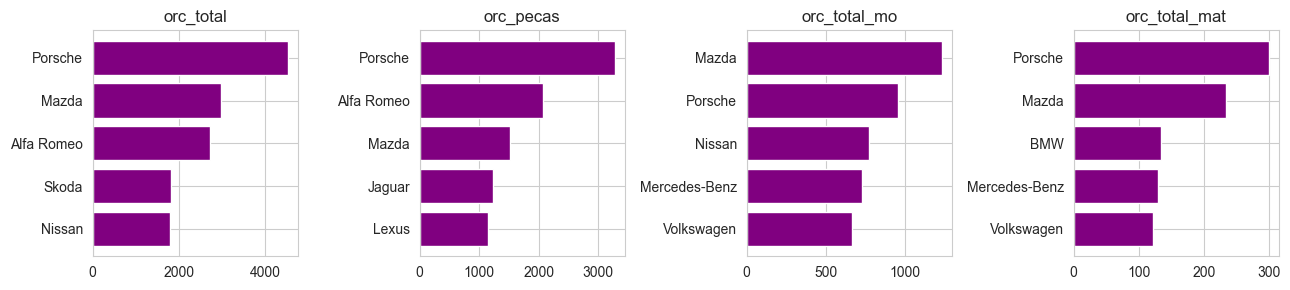

In [770]:
df_medias_orc = [medias_orc_marca_ordenadas_total, medias_orc_marca_ordenadas_pecas, medias_orc_marca_ordenadas_mo, medias_orc_marca_ordenadas_mat]
variaveis_medias_orc = ['orc_total', 'orc_pecas', 'orc_total_mo', 'orc_total_mat']

num_linhas_orc = 1
num_medias_orc = len(variaveis_medias_orc)

fig, axes = plt.subplots(nrows=num_linhas_orc, ncols=num_medias_orc, figsize=(13, 3))

for i, (df, variavel) in enumerate(zip(df_medias_orc, variaveis_medias_orc)):
    dados = df[variavel].head(5)[::-1]
    axes[i].barh(y=dados.index, width=dados.values, color='purple')
    axes[i].set_title(variavel)

plt.tight_layout()
plt.show()

**Nota:**

Como podemos observar pelos gráficos, a marca 'Porches' é sem dúvida a marca de veículos que tem valores de reparação no geral mais elevados. Isto acontece especialmente pelo valor elevado das peças para estes veículos, tendo um custo em materiais para a sua reparação também maior que as outras marcas no geral.
Seguem-se os veículos das marcas 'Mazda', 'Alfa-Romeu', 'Mercedes-Benz' e 'Skoda', tendo em conta os orçamentos totais.

No caso de termos em conta os orçamentos de peças, são as mesmas marcas referidas anteriormente, no top 3, seguidas das marcas 'Jaguar' e 'Lexus'.

Contudo, em termos de mão de obra, em média, os veículos da marca 'Mercedes-Benz' e 'Mazda' foram os que apresentaram valores mais elevados, aparecendo a marca 'Porches' em terceiro lugar. Seguindo-se os veículos das marcas 'Nissan', 'Volkswagen', 'BMW' e 'Seat' (incluí os primeiros 7, por os últimos 3 terem valores médios muito próximos).

Tendo em conta que para a oficina as margens de lucro em termos de mão de obra são mais elevadas relativamente às peças e materiais, podemos analisar que para a oficina compensa investir em especializar-se e orientar o seu negócio para reparar mais veículos destas marcas: 'Mercedes-Benz', 'Mazda', Porches', 'Nissan', 'Volkswagen', 'BMW' e 'Seat'.

---

#### 4.2.4. Análise de tempos totais de reparação de veículos

> Neste capítulo da minha análise vou dedicar-me a avaliar o tempo médio que a oficina demora a reparar um veículo, e depois relacionar esse tempo com o valor orçamentado e a marca do veículo.

In [771]:
#Sub-dataset com variáveis relativas aos tempos de reparação
oficina_df_tempo_repar = oficina_df[['marca', 'data_real_inicio_repar', 'data_real_fim_repar', 'dias_atraso_sem_fds']].copy()
oficina_df_tempo_repar.loc[:, 'tempo_repar_previsto'] = oficina_df[['tempo_repar']]
oficina_df_tempo_repar.loc[:, 'tempo_repar_real'] = oficina_df_tempo_repar['tempo_repar_previsto'] + oficina_df_tempo_repar['dias_atraso_sem_fds']
oficina_df_tempo_repar

,marca,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,tempo_repar_previsto,tempo_repar_real
id,,,,,,
3647,Citroen,2023-10-26,2023-10-31,1,3,4
3536,Peugeot,2023-11-07,2023-11-10,0,4,4
635,Fiat,2022-04-27,2022-04-29,1,2,3
3766,Nissan,2023-11-16,2023-11-17,0,2,2
2675,BMW,2023-05-08,2023-05-15,1,5,6
...,...,...,...,...,...,...
3932,Peugeot,2023-12-12,2023-12-12,0,3,3
3943,Peugeot,2023-12-20,2023-12-21,0,3,3
3843,SEAT,2023-11-17,2023-11-17,0,2,2


In [772]:
oficina_df_tempo_repar.iloc[:, -3:].describe()

,dias_atraso_sem_fds,tempo_repar_previsto,tempo_repar_real
count,998,998,998
mean,0,4,5
std,2,4,4
min,0,1,1
25%,0,2,2
50%,0,3,3
75%,0,5,5
max,22,21,35


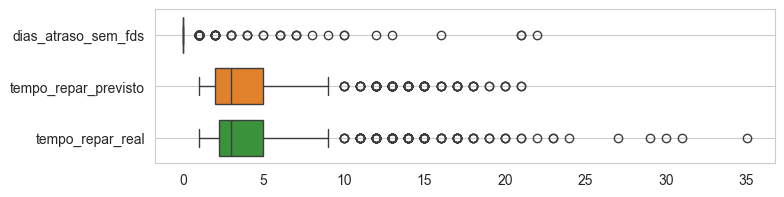

In [773]:
#Boxplot para conseguirmos identificar outliers dos tempos de reparação
plt.figure(figsize = (8, 2))
sns.boxplot(data = oficina_df_tempo_repar.iloc[:, -3:], width = 0.7, orient = 'h')
plt.grid()
plt.show()

In [774]:
#Reparações de veículos com mais de 21 dias
repar_mais_21 = oficina_df_tempo_repar[oficina_df_tempo_repar['tempo_repar_real'] > 21]
print("O número de processos em que a reparação demorou mais de 21 dias (número de dias máximo previstos) foi: {}".format(repar_mais_21.shape[0]))

O número de processos em que a reparação demorou mais de 21 dias (número de dias máximo previstos) foi: 9


In [775]:
repar_mais_21.sort_values('tempo_repar_real')

,marca,data_real_inicio_repar,data_real_fim_repar,dias_atraso_sem_fds,tempo_repar_previsto,tempo_repar_real
id,,,,,,
3809,Peugeot,2023-11-03,2023-12-05,1,21,22
4109,Peugeot,2023-12-14,2024-01-17,5,18,23
3332,Toyota,2023-09-01,2023-10-03,3,20,23
3455,Mercedes-Benz,2023-10-16,2023-11-16,21,3,24
3323,Opel,2023-08-29,2023-10-04,13,14,27
3755,Fiat,2023-11-03,2023-12-13,12,17,29
3894,Peugeot,2023-11-14,2023-12-26,16,14,30
1884,Renault,2023-01-06,2023-02-17,21,10,31
3107,Renault,2023-07-28,2023-09-15,22,13,35


**Nota:**

A média de dias previstos para a reparação foi de 4 dias, havendo reparações que se preveram demorar apenas um dia e outras que até 21 dias.

A média de dias necessários para a reparação efetiva foi de 5 dias, havendo reparações que apenas demoraram um dia e outras que demoraram 35 dias.

Os valores máximos de reparação entre o previsto e o real tiveram valores um pouco diferentes. Enquanto que o que o máximo de dias que se preveram demorar numa reparação foi de 21 dias, houve 9 reparações em que esse valor foi ultrapassado.

Dos 9 processos de reparação que demoraram mais de 21 dias, a marca de veículos mais frequente foi a 'Peugeot' e 'Renault'. Tendo em conta a análise de marcas no início da análise, uma vez que estas marcas são as mais frequentemente presente nos processos recebidos na oficina, é normal que esta prevalência aconteça também nesta questão de duração dos tempos de reparações.

---

#### 4.2.5. Análise de tempos de atrasos na reparação de veículos

In [776]:
oficina_df_tempo_repar[['dias_atraso_sem_fds']].describe()

,dias_atraso_sem_fds
count,998
mean,0
std,2
min,0
25%,0
50%,0
75%,0
max,22


In [777]:
oficina_df_atrasos_repar = oficina_df_tempo_repar[oficina_df_tempo_repar['dias_atraso_sem_fds'] > 0]
print("O número de processos de reparação que sofreram atraso foi de: {}".format(oficina_df_atrasos_repar.shape[0]))

O número de processos de reparação que sofreram atraso foi de: 95


In [778]:
media_dias_atraso_repar = int(oficina_df_atrasos_repar['dias_atraso_sem_fds'].mean())
print("A média de dias de atraso dos 95 processos com atrasos na reparação foi de: {} dias.".format(media_dias_atraso_repar))

A média de dias de atraso dos 95 processos com atrasos na reparação foi de: 3 dias.


In [779]:
print("A marca de veículos em que a reparação teve mais atrasos foi a: {}".format(oficina_df_atrasos_repar['marca'].mode()[0]))

A marca de veículos em que a reparação teve mais atrasos foi a: Renault


In [780]:
dias_atraso_totais = oficina_df_atrasos_repar['dias_atraso_sem_fds'].sum()
print("No período compreendido o número total de dias de atraso foi de: {} dias.".format(dias_atraso_totais))

No período compreendido o número total de dias de atraso foi de: 299 dias.


**Nota:**

Em média, a oficina não teve atrasos no processo de reparação efetiva dos veículos, tendo em conta os dias previstos no orçamento, contudo houve 95 processos em que se verificou um atraso. Desses 95 casos, a média de dias de atraso foi de cerca de 3 dias. A marca de veículos em que a reparação atrasou mais vezes foi a marca 'Renault'.

Se tivermos em conta todo o período em questão, no total temos 299 dias de atrasos da oficina em reparações. 

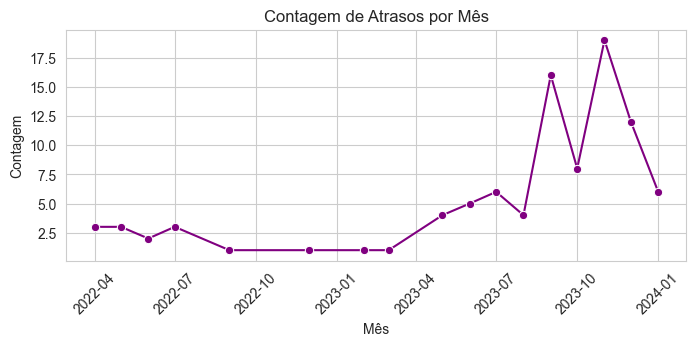

In [781]:
#Gráfico de linhas com a evolução dos atrasos ao longo dos meses
contagem_datas_atrasos = oficina_df_atrasos_repar['data_real_fim_repar'].value_counts().reset_index()

contagem_datas_atrasos['ano_mes'] = contagem_datas_atrasos['data_real_fim_repar'].dt.to_period('M').dt.to_timestamp()

contagem_mensal_atrasos = contagem_datas_atrasos.groupby('ano_mes')['count'].sum().reset_index()

plt.figure(figsize=(8, 3))
sns.lineplot(data=contagem_mensal_atrasos, x='ano_mes', y='count', marker='o', color = 'purple')
plt.title('Contagem de Atrasos por Mês')
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

**Nota:**

Através do gráfico podemos verificar que os atrasos nas reparações de veículos ocorreram em grande maioria nos últimos meses do ano de 2023 (mais expressivamente nos a partir de setembro de 2023, com um pico elevao de mais de 17 atrasos por mês em novembro). Tendo em conta as análises anteriores, nomeadamente a quantidade de processos iniciados por mês, este comportamento menos eficiente da oficina (atrasos) poderia em parte justificar-se pela maior afluência de processos na oficina. Contudo, este pico de atrasos em novembro, quando o número de processos inciados até diminui bastante, parece ter outra causa que deve ser averiguada. Iremos aprofundar um pouco melhor essas causas em seguida, tentando identificar em que parte do processo houve atrasos (mão de obra ou pintura).

> **Identificar onde ocorreu o atraso**

Irei de seguida focar-me nos processos em que houve atraso e verificar se esse atraso se deveu a atrasos nos trabalhos de chapa ou de pintura.
Irei retirar algumas variáveis do sub-dataset 'oficina_df_atrasos' para facilitar a leitura do mesmo.

In [782]:
oficina_df_atrasos_repar = oficina_df_atrasos_repar.drop(['tempo_repar_previsto', 'data_real_fim_repar'], axis=1)

In [783]:
#Trazer variáveis do dataset original para o sub-dataset oficina_df_atrasos_repar
indices_atrasos = oficina_df_atrasos_repar.index
variaveis_atrasos = ['mao_obra_chapa', 'mao_obra_pintura', 'mo_horas_orc_chapa', 'mo_horas_orc_pintura']

for variavel in variaveis_atrasos:
    valores_atrasos = oficina_df.loc[indices_atrasos, variavel].copy()
    oficina_df_atrasos_repar.loc[indices_atrasos, variavel] = valores_atrasos

oficina_df_atrasos_repar.head()

,marca,data_real_inicio_repar,dias_atraso_sem_fds,tempo_repar_real,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura
id,,,,,,,,
3647,Citroen,2023-10-26,1,4,2,2,0,0
635,Fiat,2022-04-27,1,3,0,2,0,0
2675,BMW,2023-05-08,1,6,6,12,14,19
3235,BMW,2023-09-21,2,5,3,4,14,13
3236,BMW,2023-09-21,1,5,6,7,14,13


In [784]:
#Criar novas variáveis para calcular os atrasos na mão de obra sobre a chapa e pintura
oficina_df_atrasos_repar.loc[:, 'lucro_mo_chapa'] = (oficina_df_atrasos_repar['mo_horas_orc_chapa'] - oficina_df_atrasos_repar['mao_obra_chapa'] )
oficina_df_atrasos_repar.loc[:, 'lucro_mo_pintura'] = (oficina_df_atrasos_repar['mo_horas_orc_pintura'] - oficina_df_atrasos_repar['mao_obra_pintura'] )

In [785]:
#Apresentar valores em float
pd.set_option('display.float_format', '{:.2f}'.format)
oficina_df_atrasos_repar

,marca,data_real_inicio_repar,dias_atraso_sem_fds,tempo_repar_real,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura
id,,,,,,,,,,
3647,Citroen,2023-10-26,1,4,2.50,2.00,0.00,0.00,-2.50,-2.00
635,Fiat,2022-04-27,1,3,0.00,2.00,0.00,0.00,0.00,-2.00
2675,BMW,2023-05-08,1,6,6.00,12.00,14.26,18.59,8.26,6.59
3235,BMW,2023-09-21,2,5,3.00,3.50,14.39,12.58,11.39,9.08
3236,BMW,2023-09-21,1,5,6.00,7.00,14.39,12.58,8.39,5.58
...,...,...,...,...,...,...,...,...,...,...
2711,Peugeot,2023-06-19,1,5,2.00,3.00,8.64,4.09,6.64,1.09
2683,BMW,2023-05-31,3,6,2.50,2.00,8.24,4.24,5.74,2.24
937,Renault,2022-07-15,8,11,2.00,2.50,3.92,4.42,1.92,1.92


In [786]:
oficina_df_atrasos_repar.describe()

,data_real_inicio_repar,dias_atraso_sem_fds,tempo_repar_real,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura
count,95,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00
mean,2023-07-19 10:36:37.894736896,3.15,8.76,5.40,3.87,14.31,6.07,8.91,2.20
min,2022-04-11 00:00:00,1.00,2.00,0.00,0.00,0.00,0.00,-2.50,-2.00
25%,2023-06-19 00:00:00,1.00,4.00,2.25,2.00,5.45,3.25,2.70,0.84
50%,2023-09-14 00:00:00,1.00,5.00,4.00,3.50,8.89,5.28,5.76,1.88
75%,2023-11-10 00:00:00,3.00,11.00,6.75,4.50,18.62,8.35,11.27,2.99
max,2024-01-09 00:00:00,22.00,35.00,34.00,12.00,94.24,18.59,60.24,9.56
std,NaN,4.42,7.62,5.51,2.69,15.11,4.10,10.06,2.09


**Nota:**

Vou referir-me ao número de horas que os profissionais conseguiram reduzir ao previsto no orçamento como lucro.

Nos veículos que sofreram atrasos na reparação, a média de horas de lucro em mão de obra em chapa foi de cerca de 9 horas. Contudo a distribuição dos lucros neste campo é bastante dispar. Tem valores de lucro em mão de obra na chapa até mais de 60 horas.

Nos veículos que sofreram atrasos na reparação, a média de horas de lucro em mão de obra em pintura foi de cerca de 2 horas. Um valor mais reduzido comparativamente à chapa, e com menos dispersão, o valor máximo de lucro na pintura é de próximo das 10 horas.

Podemos concluir que a oficina consegue obter maior lucro na mão de obra na chapa. É importante realizar esta análise, de forma à oficina puder beneficiar os profissionais responsáveis pela mão de obra na chapa.

In [787]:
###### Reparações com atrasos gerais mas com número de horas de prejuízo de mão de obra em chapa (demoraram menos horas que o previsto)
oficina_df_atrasos_repar[oficina_df_atrasos_repar['lucro_mo_chapa'] < 0]

,marca,data_real_inicio_repar,dias_atraso_sem_fds,tempo_repar_real,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura
id,,,,,,,,,,
3647,Citroen,2023-10-26,1,4,2.50,2.00,0.00,0.00,-2.50,-2.00
3256,Renault,2023-10-19,2,4,2.50,0.00,1.88,0.00,-0.62,0.00
3318,Nissan,2023-09-12,1,4,5.00,3.00,4.73,4.79,-0.27,1.79
3874,Fiat,2023-11-29,1,2,0.50,0.50,0.37,1.02,-0.13,0.52
3295,Ford,2023-09-11,2,4,1.00,1.00,0.75,1.83,-0.25,0.83


In [788]:
#Reparações com atrasos gerais mas com número de horas de prejuízo de mão de obra em pintura (demoraram menos horas que o previsto)
oficina_df_atrasos_repar[oficina_df_atrasos_repar['lucro_mo_pintura'] < 0]

,marca,data_real_inicio_repar,dias_atraso_sem_fds,tempo_repar_real,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura
id,,,,,,,,,,
3647,Citroen,2023-10-26,1,4,2.50,2.00,0.00,0.00,-2.50,-2.00
635,Fiat,2022-04-27,1,3,0.00,2.00,0.00,0.00,0.00,-2.00


**Nota:**

* Os 4 veículos do processo de reparação de index 3256, 3318, 3874 e 3295, apresentaram prejuizos na mão de obra de chapa, ou seja, necessitaram de mais horas para o realizar do que o previsto no orçamento. Esses prejuízos compreenderam-se entre valores de apenas cerca de 8 minutos a 37 minutos.

* O veículo do processo de reparação de index 3647, teve prejuizos tanto na mão de obra de chapa como na pintura. No processo de orçamentação não foi previsto nenhumas horas de mão de obra na chapa ou pintura, mas acabou por ser necessário gastar 2 horas e meia de mão de obra em chapa e 2 horas na pintura. Possivelmente este veículo poderá tratar-se de uma reparação antiga que voltou à oficina para colmatar algumas falhas no processo anterior e daí não se ter orçamentado novamente.

* O veículo do processo de reparação de index 635, apresentou prejuizos na mão de obra de pintura, mas tal como o veículo de index 3647, teve este prejuízo por não haver horas orçamentadas para a pintura do veículo.

Estamos a referirmo-nos apenas ao grupo de veículos que sofreram atrasos no geral da sua reparação, no sentido de justificar os atrasos nas reparações por atrasos nas horas de mão de obra. Contudo podemos concluir que esses atrasos não se devem a atrasos na mão de obra, uma vez que os profissionais de mão de obra tende a cumprir na sua grande maioria o número de horas previstas no orçamento. Apenas os 4 processos referidos anteriormente, dos 95 processos em que houve atrasos, poderiam justificar os atrasos gerais na reparação destes veículos, mas tendo em conta os valores de prejuizos não parece ser o caso.

---

#### 4.2.6. Análise de lucros número de horas de mão de obra

> Irei realizar uma análise agora geral (com todos os processos de reparação) dos lucros e prejuízos no número de horas de mão de obra.

Como já referi anteriormente:

* lucro refere-se ao número de horas que os profissionais necessitaram a menos comparativamente ao previsto no orçamento para a mão de obra;
* prejuizo refere-se ao número de horas que os profissionais necessitaram a mais comparativamente ao previsto no orçamento para a mão de obra.

In [789]:
oficina_df_orc_horas = oficina_df[['mao_obra_chapa', 'mao_obra_pintura', 'mo_horas_orc_chapa', 'mo_horas_orc_pintura']]
oficina_df_orc_horas

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura
id,,,,
3647,2.50,2.00,0.00,0.00
3536,4.00,5.00,0.00,0.00
635,0.00,2.00,0.00,0.00
3766,0.00,2.00,4.09,1.94
2675,6.00,12.00,14.26,18.59
...,...,...,...,...
3932,1.50,0.00,3.75,0.00
3943,1.50,0.00,2.75,0.00
3843,0.20,0.00,0.25,0.00


> **Remover Orçamentos incompatíveis**

Vou remover desta análise do sub-dataset 'oficina_df_orc_horas' os processos em que não foi previsto no orçamento qualquer mão de obra para a reparação. Que como já referi anteriormente devem-se referir a casos anteriores de reparação que não foram corretamente realizados ou outras questões burocráticas. Contudo devemos sempre averiguar estes 5 casos com a oficina de forma a avaliar corretamente o que sucedeu.

In [790]:
orc_incompativeis = oficina_df_orc_horas[(oficina_df_orc_horas['mo_horas_orc_chapa'] == 0) & (oficina_df_orc_horas['mo_horas_orc_pintura'] == 0)]
orc_incompativeis

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura
id,,,,
3647,2.50,2.00,0.00,0.00
3536,4.00,5.00,0.00,0.00
635,0.00,2.00,0.00,0.00
943,7.00,5.00,0.00,0.00
3659,1.50,2.50,0.00,0.00


In [791]:
orc_incompativeis.index

Index([3647, 3536, 635, 943, 3659], dtype='int64', name='id')

In [792]:
oficina_df_orc_horas
indices_orc_imcompativeis = orc_incompativeis.index
oficina_df_orc_horas = oficina_df_orc_horas.drop(indices_orc_imcompativeis, axis = 0)
oficina_df_orc_horas

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura
id,,,,
3766,0.00,2.00,4.09,1.94
2675,6.00,12.00,14.26,18.59
2588,1.50,2.00,3.08,2.33
4127,2.00,2.00,5.01,3.34
4122,5.00,3.50,10.64,4.21
...,...,...,...,...
3932,1.50,0.00,3.75,0.00
3943,1.50,0.00,2.75,0.00
3843,0.20,0.00,0.25,0.00


In [793]:
#Criar novas variáveis para calcular os lucros na mão de obra sobre a chapa e pintura
oficina_df_orc_horas.loc[:, 'lucro_mo_chapa'] = (oficina_df_orc_horas['mo_horas_orc_chapa'] - oficina_df_orc_horas['mao_obra_chapa'] )
oficina_df_orc_horas.loc[:, 'lucro_mo_pintura'] = (oficina_df_orc_horas['mo_horas_orc_pintura'] - oficina_df_orc_horas['mao_obra_pintura'] )

#Apenas horas de lucro totais
lucro_mo_chapa_positivo = oficina_df_orc_horas['lucro_mo_chapa'].apply(lambda x: max(0, x))
lucro_mo_pintura_positivo = oficina_df_orc_horas['lucro_mo_pintura'].apply(lambda x: max(0, x))
oficina_df_orc_horas.loc[:,'lucro_mo_total'] = lucro_mo_chapa_positivo + lucro_mo_pintura_positivo

#Apenas horas de prejuízo totais
lucro_mo_chapa_negativo = oficina_df_orc_horas['lucro_mo_chapa'].apply(lambda x: min(x, 0))
lucro_mo_pintura_negativo = oficina_df_orc_horas['lucro_mo_pintura'].apply(lambda x: min(x, 0))
oficina_df_orc_horas.loc[:,'prejuizo_mo_total'] = abs(lucro_mo_chapa_negativo) + abs(lucro_mo_pintura_negativo)

oficina_df_orc_horas

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura,lucro_mo_total,prejuizo_mo_total
id,,,,,,,,
3766,0.00,2.00,4.09,1.94,4.09,-0.06,4.09,0.06
2675,6.00,12.00,14.26,18.59,8.26,6.59,14.85,0.00
2588,1.50,2.00,3.08,2.33,1.58,0.33,1.91,0.00
4127,2.00,2.00,5.01,3.34,3.01,1.34,4.35,0.00
4122,5.00,3.50,10.64,4.21,5.64,0.71,6.35,0.00
...,...,...,...,...,...,...,...,...
3932,1.50,0.00,3.75,0.00,2.25,0.00,2.25,0.00
3943,1.50,0.00,2.75,0.00,1.25,0.00,1.25,0.00
3843,0.20,0.00,0.25,0.00,0.05,0.00,0.05,0.00


In [794]:
lucros_mo_geral = oficina_df_orc_horas[(oficina_df_orc_horas['lucro_mo_chapa'] > 0) | (oficina_df_orc_horas['lucro_mo_pintura'] > 0)]
print("O número de veículos em que a oficina teve lucro no número de horas de mão de obra no geral foi de: {}".format(lucros_mo_geral.shape[0]))

O número de veículos em que a oficina teve lucro no número de horas de mão de obra no geral foi de: 987


In [795]:
lucros_mo_chapa_e_pintura = oficina_df_orc_horas[(oficina_df_orc_horas['lucro_mo_total'] > 0) & (oficina_df_orc_horas['lucro_mo_pintura'] > 0)]
print("O número de veículos em que a oficina teve lucro no número de horas de mão de obra tanto em chapa como em pintura foi de: {}".format(lucros_mo_chapa_e_pintura.shape[0]))

O número de veículos em que a oficina teve lucro no número de horas de mão de obra tanto em chapa como em pintura foi de: 909


In [796]:
lucros_mo_total_ano = oficina_df_orc_horas['lucro_mo_total'].sum()
print("O número de horas totais que a oficina teve de lucro de mão de obra tanto em chapa como em pintura foi de: {}".format(lucros_mo_total_ano))

O número de horas totais que a oficina teve de lucro de mão de obra tanto em chapa como em pintura foi de: 8191.16


In [797]:
prejuizos_mo_total_ano = round(oficina_df_orc_horas['prejuizo_mo_total'].sum(), 2)
print("O número de horas totais que a oficina teve de prejuízo de mão de obra tanto em chapa como em pintura foi de: {}".format(prejuizos_mo_total_ano))

O número de horas totais que a oficina teve de prejuízo de mão de obra tanto em chapa como em pintura foi de: 38.42


**Nota:**

No geral o número de veículos que apresentaram lucros na mão de obra (em chapa ou em pintura) foi de 987 veículos (cerca de 99% de todos os processos que foram realmente orçamentados), o que é sem dúvida uma conclusão muito boa para a oficina, demonstrando uma eficiência em cumprir os orçamentos muito bem conseguida.

Desses 987, temos ainda 900 reparações (cerca de 99% de todos os processos que foram realmente orçamentados) que tiveram lucros tanto em termos de mão de obra de chapa como em pintura, o que ainda é mais notável.

No período compreendido dos nossos dados, a oficina teve um total de horas de lucro de um pouco mais de 8191 horas, para apenas um pouco mais de 38 horas e meia de prejuízo no total.

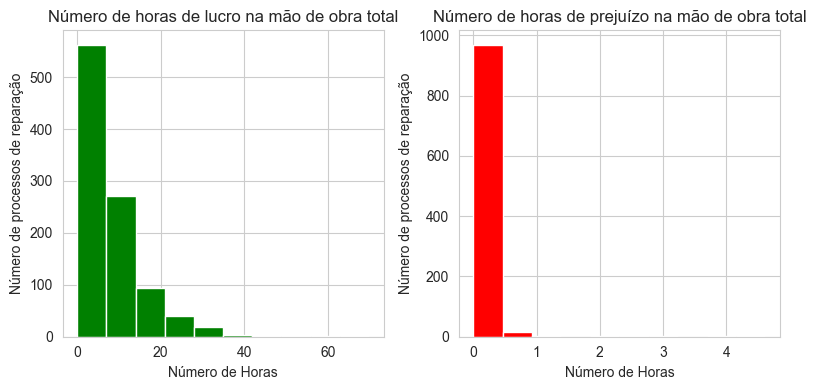

In [798]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.hist(oficina_df_orc_horas['lucro_mo_total'], color="green")
ax1.set_title('Número de horas de lucro na mão de obra total')
ax1.set_xlabel('Número de Horas')
ax1.set_ylabel('Número de processos de reparação')
ax1.grid(True)

ax2.hist(oficina_df_orc_horas['prejuizo_mo_total'], color="red")
ax2.set_title('Número de horas de prejuízo na mão de obra total')
ax2.set_xlabel('Número de Horas')
ax2.set_ylabel('Número de processos de reparação')
ax2.grid(True)

plt.tight_layout()
plt.show()

---

> **Lucros Mão de obra Chapa**

In [799]:
lucros_mo_chapa = oficina_df_orc_horas[oficina_df_orc_horas['lucro_mo_chapa'] > 0]
print("O número de reparações em que a oficina teve lucro no número de horas de mão de obra em chapa foi de: {}".format(lucros_mo_chapa.shape[0]))

O número de reparações em que a oficina teve lucro no número de horas de mão de obra em chapa foi de: 977


In [800]:
lucros_mo_chapa.describe()

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura,lucro_mo_total,prejuizo_mo_total
count,977.00,977.00,977.00,977.00,977.00,977.00,977.00,977.00
mean,4.24,3.33,10.84,5.08,6.60,1.75,8.37,0.02
std,3.83,2.30,9.97,3.40,6.56,1.63,7.43,0.14
min,0.00,0.00,0.24,0.00,0.05,-2.37,0.05,0.00
25%,2.00,2.00,4.31,3.08,2.26,0.75,3.45,0.00
50%,3.00,3.00,7.76,4.42,4.51,1.34,6.14,0.00
75%,6.00,4.00,14.27,6.52,8.65,2.34,11.02,0.00
max,34.00,21.00,94.24,26.51,60.24,18.09,69.80,2.37


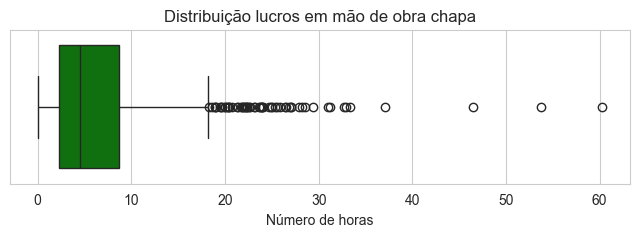

In [801]:
plt.figure(figsize=(8, 2))
sns.boxplot(data = lucros_mo_chapa['lucro_mo_chapa'], color ='green', orient='h')
plt.title('Distribuição lucros em mão de obra chapa')
plt.xlabel('Número de horas')
plt.show()

In [802]:
lucros_mo_chapa[lucros_mo_chapa['lucro_mo_chapa'] > 30]

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura,lucro_mo_total,prejuizo_mo_total
id,,,,,,,,
2626,17.00,11.00,49.94,13.80,32.94,2.80,35.74,0.00
3809,29.00,8.00,82.76,10.61,53.76,2.61,56.37,0.00
3755,18.00,4.00,50.75,5.14,32.75,1.14,33.89,0.00
3518,16.00,8.00,53.07,16.58,37.07,8.58,45.65,0.00
3332,34.00,7.00,94.24,16.56,60.24,9.56,69.80,0.00
2361,17.00,7.00,50.37,9.41,33.37,2.41,35.78,0.00
4066,14.00,10.00,44.97,13.63,30.97,3.63,34.60,0.00
2984,14.00,9.00,45.18,13.44,31.18,4.44,35.62,0.00
2838,17.00,9.00,63.45,16.57,46.45,7.57,54.02,0.00


**Nota:**

Nos 977 processos de reparação em que houve horas de lucro na mão de obra de chapa, concluímos que em média os profissionais de chapa necessitaram a menos cerca 6 hora e meia para concluir a reparação, do que o previsto.

De referir alguns valores de lucros em horas acima as 30 horas mais cedo que o previsto, em 9 veículos exatamente. Nestes veículos parece haver uma eficiência muito marcada dos profissionais da oficina. Contudo será importante averiguar melhor estas observações, se efetivamente a oficina foi muito eficiente ou se houve algum lapso.

---

> **Lucros Mão de obra Pintura**

In [803]:
lucros_mo_pintura = oficina_df_orc_horas[oficina_df_orc_horas['lucro_mo_pintura'] > 0]
print("O número de reparações em que a oficina teve lucro no número de horas de mão de obra em pintura foi de: {}".format(lucros_mo_pintura.shape[0]))

O número de reparações em que a oficina teve lucro no número de horas de mão de obra em pintura foi de: 909


In [804]:
lucros_mo_pintura.describe()

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura,lucro_mo_total,prejuizo_mo_total
count,909.00,909.00,909.00,909.00,909.00,909.00,909.00,909.00
mean,4.42,3.46,11.28,5.38,6.85,1.92,8.78,0.01
std,3.88,2.25,10.11,3.31,6.69,1.58,7.49,0.20
min,0.00,0.00,0.32,0.93,-4.62,0.03,0.28,0.00
25%,2.00,2.00,4.76,3.30,2.50,0.89,3.82,0.00
50%,3.00,3.00,8.01,4.72,4.87,1.45,6.42,0.00
75%,6.00,4.00,15.05,6.75,9.02,2.47,11.49,0.00
max,34.00,21.00,94.24,26.51,60.24,18.09,69.80,4.62


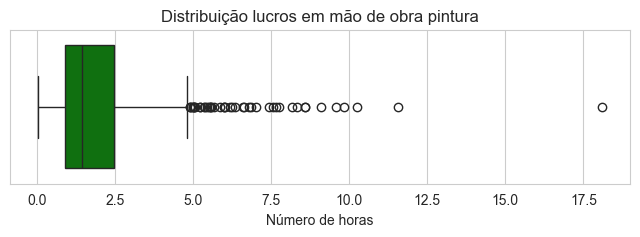

In [805]:
plt.figure(figsize=(8, 2))
sns.boxplot(data = lucros_mo_pintura['lucro_mo_pintura'], color ='green', orient='h')
plt.title('Distribuição lucros em mão de obra pintura')
plt.xlabel('Número de horas')
plt.show()

**Nota:**

Nos 909 processos de reparação em que houve horas de lucro na mão de obra de pintura, concluímos que em média os profissionais de pintura necessitaram a menos cerca 2 hora para concluir a reparação, do que o previsto.

De referir um veículo em que as horas de lucro de pintura são superiores a 17 horas. Em que observando os dados de real número de horas usados tanto para pintura como para chapa são iguais, 0.5. Esta igualdade, a par com valores orçamentados de horas diferentes, sugere que posso haver aqui algum erro de preenchimento dos dados. Seria um valor a confirmar com a oficina.

In [806]:
lucros_mo_pintura[lucros_mo_pintura['lucro_mo_pintura'] > 17]

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura,lucro_mo_total,prejuizo_mo_total
id,,,,,,,,
2670,0.50,0.50,14.26,18.59,13.76,18.09,31.85,0.00


---

---

#### 4.2.7. Análise de prejuízos número de horas de mão de obra

In [807]:
prejuizos_mo_geral = oficina_df_orc_horas[(oficina_df_orc_horas['lucro_mo_chapa'] < 0) | (oficina_df_orc_horas['lucro_mo_pintura'] < 0)]
print("O número de veículos em que a oficina teve prejuízo no número de horas de mão de obra no geral foi de: {}".format(prejuizos_mo_geral.shape[0]))

O número de veículos em que a oficina teve prejuízo no número de horas de mão de obra no geral foi de: 50


In [808]:
prejuizos_mo_chapa_e_pintura = oficina_df_orc_horas[(oficina_df_orc_horas['lucro_mo_chapa'] < 0) & (oficina_df_orc_horas['lucro_mo_pintura'] < 0)]
print("O número de veículos em que a oficina teve prejuízo no número de horas de mão de obra em chapa e em pintura foi de: {}".format(prejuizos_mo_chapa_e_pintura.shape[0]))

O número de veículos em que a oficina teve prejuízo no número de horas de mão de obra em chapa e em pintura foi de: 4


In [809]:
prejuizos_mo_chapa_e_pintura

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura,lucro_mo_total,prejuizo_mo_total
id,,,,,,,,
3297,1.50,2.00,0.31,0.00,-1.19,-2.00,0.00,3.19
3060,9.00,7.00,7.88,5.07,-1.12,-1.93,0.00,3.05
2720,1.00,1.50,0.84,1.05,-0.16,-0.45,0.00,0.61
2556,1.00,3.00,0.63,1.21,-0.37,-1.79,0.00,2.16


In [810]:
prejuizos_mo_total_ano = round(abs(oficina_df_orc_horas['prejuizo_mo_total'].sum()), 2)
print("O número de horas totais que a oficina teve de prejuizo de mão de obra tanto em chapa como em pintura foi de: {}".format(prejuizos_mo_total_ano))

O número de horas totais que a oficina teve de prejuizo de mão de obra tanto em chapa como em pintura foi de: 38.42


**Nota:**

No geral o número de veículos que apresentaram prejuízos na mão de obra foi de 55, sendo que apenas 4 desses apresentaram prejuízos tanto na mão de obra de chapa, como na mão de obra de pintura.

Dos 4 veículos referidos acima, os valores de horas de prejuízo não ultrapassaram as 2 horas. Nestes 4 veículos seria importante analisar com a oficina se estes atrasos se deveram a má gestão dos processos e profissionais entre a chapa e a pintura.

No período compreendido dos nossos dados, a oficina teve um total de horas de prejuízo de um pouco mais de 38 horas e meia.

> **Prejuízos Mão de obra Chapa**

In [811]:
prejuizos_mo_chapa = oficina_df_orc_horas[oficina_df_orc_horas['lucro_mo_chapa'] < 0]
print("O número de veículos em que a oficina teve prejuízo no número de horas de mão de obra em chapa foi de: {}".format(prejuizos_mo_chapa.shape[0]))

O número de veículos em que a oficina teve prejuízo no número de horas de mão de obra em chapa foi de: 12


In [812]:
prejuizos_mo_chapa.describe()

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura,lucro_mo_total,prejuizo_mo_total
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,3.62,2.42,2.56,2.57,-1.07,0.15,0.66,1.58
std,3.95,2.16,2.77,2.58,1.54,1.49,0.86,1.69
min,0.50,0.00,0.31,0.00,-4.62,-2.00,0.00,0.05
25%,1.00,1.00,0.56,1.04,-1.14,-0.78,0.00,0.23
50%,1.25,1.75,0.90,1.28,-0.32,0.28,0.28,0.61
75%,6.00,3.00,5.02,4.84,-0.17,1.07,1.07,3.08
max,10.50,7.00,7.88,8.26,-0.05,2.26,2.26,4.62


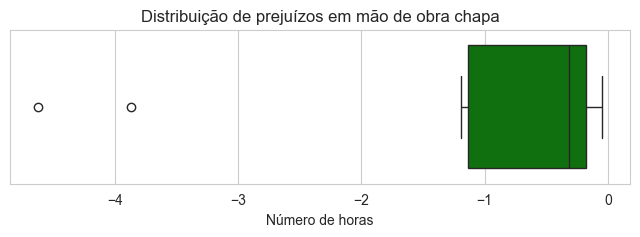

In [813]:
plt.figure(figsize=(8, 2))
sns.boxplot(data = prejuizos_mo_chapa['lucro_mo_chapa'], color ='green', orient='h')
plt.title('Distribuição de prejuízos em mão de obra chapa')
plt.xlabel('Número de horas')
plt.show()

In [814]:
prejuizos_mo_chapa[prejuizos_mo_chapa['lucro_mo_chapa'] < -3.5]

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura,lucro_mo_total,prejuizo_mo_total
id,,,,,,,,
3265,10.00,6.00,6.13,8.26,-3.87,2.26,2.26,3.87
3974,10.50,3.00,5.88,5.01,-4.62,2.01,2.01,4.62


**Nota:**

Nos 12 processos de reparação em que houve horas de prejuízo na mão de obra de chapa, concluímos que em média os profissionais de chapa necessitaram de cerca de mais 1 hora para concluir a reparação.

Contudo temos alguns valores que devemos dar mais atenção, para os 2 veículos em que esses profissionais demoraram mais de 3 horas e meia além do previsto.

> **Prejuízos Mão de obra Pintura**

In [815]:
prejuizos_mo_pintura = oficina_df_orc_horas[oficina_df_orc_horas['lucro_mo_pintura'] < 0]
print("O número de veículos em que a oficina teve prejuízo no número de horas de mão de obra em chapa foi de: {}".format(prejuizos_mo_pintura.shape[0]))

O número de veículos em que a oficina teve prejuízo no número de horas de mão de obra em chapa foi de: 42


In [816]:
prejuizos_mo_pintura.describe()

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura,lucro_mo_total,prejuizo_mo_total
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,2.93,3.13,6.26,2.52,3.33,-0.61,3.40,0.68
std,2.70,2.18,5.83,1.92,3.72,0.61,3.65,0.78
min,0.00,0.20,0.31,0.00,-1.19,-2.37,0.00,0.03
25%,1.00,2.00,2.69,1.27,1.02,-0.66,1.02,0.21
50%,2.00,3.00,4.86,2.27,2.07,-0.46,2.07,0.49
75%,3.88,4.00,7.60,3.45,4.91,-0.21,4.91,0.66
max,12.00,11.00,29.79,8.71,17.79,-0.03,17.79,3.19


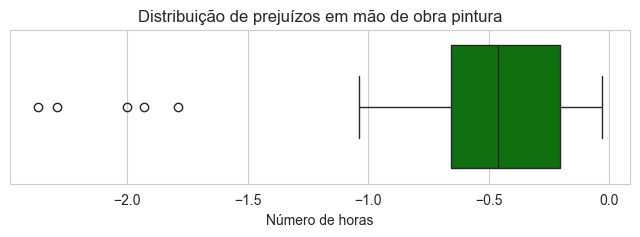

In [817]:
plt.figure(figsize=(8, 2))
sns.boxplot(data = prejuizos_mo_pintura['lucro_mo_pintura'], color ='green', orient='h')
plt.title('Distribuição de prejuízos em mão de obra pintura')
plt.xlabel('Número de horas')
plt.show()

In [818]:
prejuizos_mo_pintura[prejuizos_mo_pintura['lucro_mo_pintura'] < -1.5]

,mao_obra_chapa,mao_obra_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,lucro_mo_chapa,lucro_mo_pintura,lucro_mo_total,prejuizo_mo_total
id,,,,,,,,
3297,1.50,2.00,0.31,0.00,-1.19,-2.00,0.00,3.19
3902,12.00,11.00,29.79,8.71,17.79,-2.29,17.79,2.29
3060,9.00,7.00,7.88,5.07,-1.12,-1.93,0.00,3.05
2178,2.00,5.50,2.13,3.13,0.13,-2.37,0.13,2.37
2556,1.00,3.00,0.63,1.21,-0.37,-1.79,0.00,2.16


**Nota:**

Nos 42 processos de reparação em que houve horas de prejuízo na mão de obra de pintura, concluímos que em média os profissionais de chapa necessitaram de pouco mais de 30 minutos para concluir a reparação, além do previsto.

Contudo temos alguns valores que devemos dar mais atenção, para os 5 veículos em que esses profissionais demoraram mais de 1 hora e meia além do previsto.

**Conclusões lucros vs prejuízos horas:**

Os lucros na oficina em termos de horas gastas na reparações em mão de obra são em geral muito mais expressivos que os prejuízos que tendem a existir.

Os lucros na oficina em termos de horas gastas a menos nas reparações em mão de obra são maiores no que se refere à chapa.

Os prejuízos na oficina em termos de horas gastas a mais nas reparações em mão de obra são menores no que se refere à pintura.

---

---

### 4.3. Análise exploratória por oficina

#### 4.3.1. Análise de veículos imobilizados - por oficina

In [819]:
#Incluir coluna 'oficina' ao sub-dataset anteriormente criado dos veículos rebocados e remoção de colunas que já não necessitamos
oficina_df_rebocados.loc[:, 'oficina'] = oficina_df['oficina']
oficina_df_rebocados.drop(['dias_ate_peritagem_rebocados', 'dias_peritagem_autorizacao_rebocados', 'dias_autoriz_agendamento_rebocados', 'dias_agendamento_inicio_rep_rebocados'], axis = 1, inplace = True)
oficina_df_rebocados.head()

,imobilizado,data_reboque,total_dias_espera,oficina
id,,,,
4204,Sim,2023-12-21,12,Queluz
4179,Sim,2023-12-19,8,Queluz
4109,Sim,2023-12-11,3,Queluz
4027,Sim,2023-11-27,9,Queluz
3997,Sim,2023-11-22,23,Carnaxide


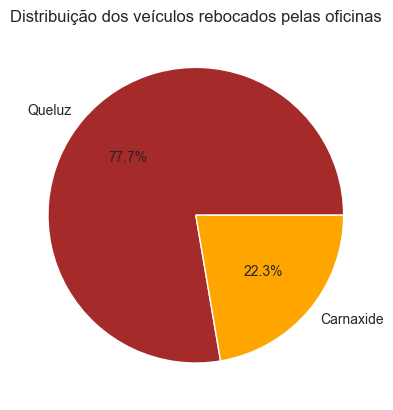

In [820]:
from collections import Counter 

rebocados_oficina_dict = Counter(oficina_df_rebocados['oficina'])

rebocados_oficina = oficina_df_rebocados['oficina'].value_counts()

plt.pie(rebocados_oficina, labels=rebocados_oficina_dict, autopct='%1.1f%%', colors=['brown', 'orange'])
plt.title('Distribuição dos veículos rebocados pelas oficinas')
plt.show()

In [821]:
rebocados_queluz = oficina_df_rebocados[oficina_df_rebocados['oficina'] == 'Queluz']
print("Na oficina de Queluz a média de dias que um veículo imobilizado esperou na oficina foi de: {} dias.".format(int(rebocados_queluz['total_dias_espera'].mean())))

Na oficina de Queluz a média de dias que um veículo imobilizado esperou na oficina foi de: 14 dias.


In [822]:
rebocados_carnaxide = oficina_df_rebocados[oficina_df_rebocados['oficina'] == 'Carnaxide']
print("Na oficina de Carnaxide a média de dias que um veículo imobilizado esperou na oficina foi de: {} dias.".format(int(rebocados_carnaxide['total_dias_espera'].mean())))

Na oficina de Carnaxide a média de dias que um veículo imobilizado esperou na oficina foi de: 16 dias.


**Nota:**

A oficina de Queluz recebeu muito mais veículos rebocados do que Carnaxide. Possivelmente a oficina de Queluz terá mais espaço disponível para haver esta distribuição diferente entre os locais.

Em termos de tempos de espera, a média de dias que estes veículos estiveram parados na oficina sem iniciar a reparação foi de 14 dias em Queluz e 16 dias em Carnaxide, valores muito proximos.

---

#### 4.3.2. Análise de tempos totais de reparação - por oficina

In [823]:
#Incluir coluna 'oficina' ao sub-dataset anteriormente criado dos tempos de reparação
oficina_df_tempo_repar.loc[:, 'oficina'] = oficina_df['oficina']

In [824]:
#Selecionar apenas os veículos reparados em Queluz
oficina_df_tempo_repar_queluz = oficina_df_tempo_repar[oficina_df_tempo_repar['oficina'] == 'Queluz']
tempo_repar_queluz = oficina_df_tempo_repar_queluz['tempo_repar_real']
print("Na oficina de Queluz o tempo médio de reparação é de {} dias.".format(int(tempo_repar_queluz.mean())))

Na oficina de Queluz o tempo médio de reparação é de 6 dias.


In [825]:
#Selecionar apenas os veículos reparados em Carnaxide
oficina_df_tempo_repar_carnaxide = oficina_df_tempo_repar[oficina_df_tempo_repar['oficina'] == 'Carnaxide']
tempo_repar_carnaxide = oficina_df_tempo_repar_carnaxide['tempo_repar_real']
print("Na oficina de Carnaxide o tempo médio de reparação é de {} dias.".format(int(tempo_repar_carnaxide.mean())))

Na oficina de Carnaxide o tempo médio de reparação é de 4 dias.


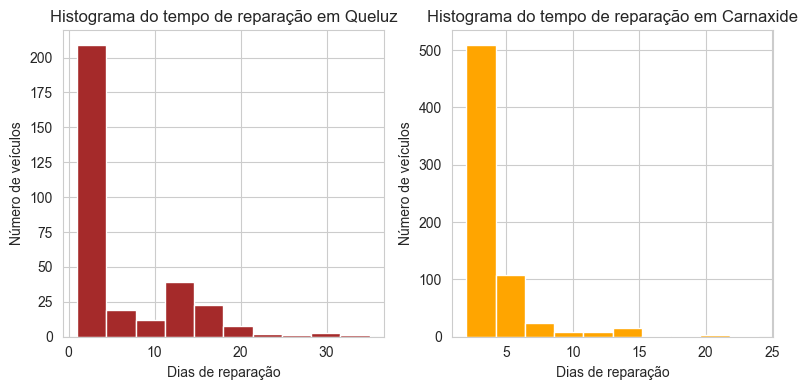

In [826]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.hist(tempo_repar_queluz, color='brown')
ax1.set_xlabel('Dias de reparação')
ax1.set_ylabel('Número de veículos')
ax1.set_title('Histograma do tempo de reparação em Queluz')
ax1.grid(True)

ax2.hist(tempo_repar_carnaxide, color='orange')
ax2.set_xlabel('Dias de reparação')
ax2.set_ylabel('Número de veículos')
ax2.set_title('Histograma do tempo de reparação em Carnaxide')
ax2.grid(True)

plt.tight_layout()
plt.show()

**Nota:**

Como podemos facilmente identificar pelos histogramas, a oficina de Carnaxide parece ser mais eficiente em termos de dias de reparação dos veículos. Contudo temos que ter em conta que os trabalhos a desenvolver em cada veículo são diferentes, e pode acontecer que Queluz tenho recebido mais veículos com mais necessidades de reparações que exigiram reparações mais longas.

---

#### 4.3.3. Análise de tempos de atrasos nas reparações - por oficina

In [827]:
#Selecionar apenas os veículos reparados em Queluz
oficina_df_tempo_repar_queluz = oficina_df_tempo_repar[oficina_df_tempo_repar['oficina'] == 'Queluz']
atrasos_queluz = oficina_df_tempo_repar_queluz[oficina_df_tempo_repar_queluz['dias_atraso_sem_fds'] > 0]
media_atrasos_queluz = atrasos_queluz['dias_atraso_sem_fds'].mean()
print("Na oficina de Queluz o tempo médio de atraso na reparação é de {} dias.".format(int(media_atrasos_queluz)))

Na oficina de Queluz o tempo médio de atraso na reparação é de 3 dias.


In [828]:
#Selecionar apenas os veículos reparados em Carnaxide
oficina_df_tempo_repar_carnaxide = oficina_df_tempo_repar[oficina_df_tempo_repar['oficina'] == 'Carnaxide']
atrasos_carnaxide = oficina_df_tempo_repar_carnaxide[oficina_df_tempo_repar_carnaxide['dias_atraso_sem_fds'] > 0]
media_atrasos_carnaxide = atrasos_carnaxide['dias_atraso_sem_fds'].mean()
print("Na oficina de Queluz o tempo médio de atraso na reparação é de {} dias.".format(int(media_atrasos_carnaxide)))

Na oficina de Queluz o tempo médio de atraso na reparação é de 2 dias.


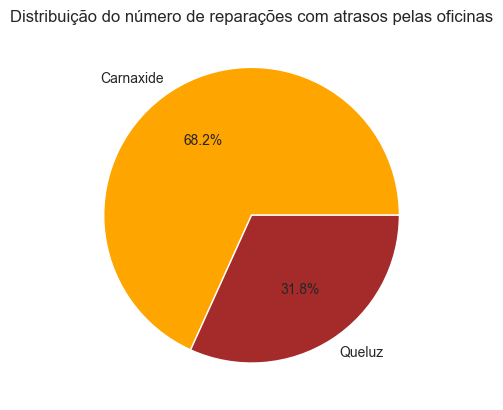

In [829]:
labels1 = Counter(oficina_df_tempo_repar['oficina'])

df1 = oficina_df_tempo_repar['oficina'].value_counts()

plt.pie(df1, labels=labels1, autopct='%1.1f%%', colors=['orange', 'brown'])
plt.title('Distribuição do número de reparações com atrasos pelas oficinas')
plt.show()

**Nota:**

A média de atrasos nas duas oficinas é idêntica, sendo a média 1 dia a mais na oficina de Queluz. Esta diferença não justifica o comportamento que vimos acima dos tempos de reparação totais nas duas oficinas. Os atrasos nas reparações, não se refletem em reparações mais longas, no geral.

Contudo tendo em conta as reparações com atraso apenas, a oficina de Carnaxide teve mais reparações com atraso (68%) do que a oficina de Queluz.

---

#### 4.3.4. Análise de lucros e prejuízos em número de horas de mão de obra - por oficina

> **Lucros por oficina**

In [830]:
#Incluir coluna 'oficina' ao sub-dataset anteriormente criado dos veículos com horas orçamentadas e remoção de colunas que já não necessitamos
oficina_df_orc_horas.loc[:, 'oficina'] = oficina_df['oficina']
oficina_df_orc_horas.drop(['mao_obra_chapa', 'mao_obra_pintura', 'mo_horas_orc_chapa', 'mo_horas_orc_pintura', 'lucro_mo_chapa', 'lucro_mo_pintura'], axis = 1, inplace = True)
oficina_df_orc_horas.head()

,lucro_mo_total,prejuizo_mo_total,oficina
id,,,
3766,4.09,0.06,Queluz
2675,14.85,0.00,Queluz
2588,1.91,0.00,Queluz
4127,4.35,0.00,Carnaxide
4122,6.35,0.00,Carnaxide


In [831]:
oficina_df_orc_horas[oficina_df_orc_horas['lucro_mo_total'] > 0].shape

(987, 3)

In [832]:
#Selecionar apenas os veículos reparados em Queluz
horas_queluz = oficina_df_orc_horas[oficina_df_orc_horas['oficina'] == 'Queluz']
#Lucros Queluz
media_lucros_horas_queluz = horas_queluz['lucro_mo_total'].mean()
print("Na oficina de Queluz o número médio de horas de lucro nas reparações é de {} horas.".format(int(media_lucros_horas_queluz)))

Na oficina de Queluz o número médio de horas de lucro nas reparações é de 7 horas.


In [833]:
#Selecionar apenas os veículos reparados em Carnaxide
horas_carnaxide = oficina_df_orc_horas[oficina_df_orc_horas['oficina'] == 'Carnaxide']
#Lucros Carnaxide
media_lucros_horas_carnaxide = horas_carnaxide['lucro_mo_total'].mean()
print("Na oficina de Carnaxide o número médio de horas de lucro nas reparações é de {} horas.".format(int(media_lucros_horas_carnaxide)))

Na oficina de Carnaxide o número médio de horas de lucro nas reparações é de 8 horas.


**Nota:**

A média de horas a menos que a oficina de Queluz necessitou para realizar as reparações foi de 7 horas, contudo foi idêntica à da oficina de Carnaxide.

> **Prejuízos por oficina**

In [834]:
#Prejuízos totais anuais Queluz
prejuizos_queluz_total_ano = round(abs(horas_queluz['prejuizo_mo_total'].sum()), 2)
print("O número de horas totais que a oficina de Queluz teve de prejuizo de mão de obra foi de {} horas".format(prejuizos_queluz_total_ano))

O número de horas totais que a oficina de Queluz teve de prejuizo de mão de obra foi de 19.91 horas


In [835]:
#Prejuízos totais anuais Carnaxide
prejuizos_carnaxide_total_ano = round(abs(horas_carnaxide['prejuizo_mo_total'].sum()), 2)
print("O número de horas totais que a oficina de Carnaxide teve de prejuizo de mão de obra foi de {} horas".format(prejuizos_carnaxide_total_ano))

O número de horas totais que a oficina de Carnaxide teve de prejuizo de mão de obra foi de 18.51 horas


**Nota:**

O número total de horas a mais, durante estes 2 anos, que a oficina de Queluz necessitou para realizar as reparações foi de quase 20 horas, contudo foi idêntica à da oficina de Carnaxide, quase 19 horas.

---

#### 4.3.5. Análise de lucros e prejuízos por oficina - gráficos gerais

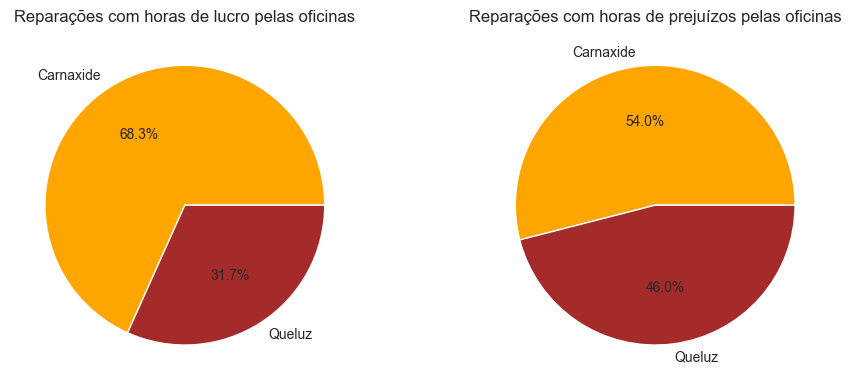

In [836]:
df_lucro = oficina_df_orc_horas[oficina_df_orc_horas['lucro_mo_total'] > 0]
df_prejuizo = oficina_df_orc_horas[oficina_df_orc_horas['prejuizo_mo_total'] > 0]

counts_lucro = df_lucro['oficina'].value_counts()
counts_prejuizo = df_prejuizo['oficina'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].pie(counts_lucro, labels=counts_lucro.index, autopct='%1.1f%%', colors=['orange', 'brown'])
axs[0].set_title('Reparações com horas de lucro pelas oficinas')

axs[1].pie(counts_prejuizo, labels=counts_prejuizo.index, autopct='%1.1f%%', colors=['orange', 'brown'])
axs[1].set_title('Reparações com horas de prejuízos pelas oficinas')

plt.tight_layout()
plt.show()

**Nota:**

A oficina de Carnaxide teve um maior número de reparações onde teve lucro ao nível de horas, cerca de 68%.

A oficina de Carnaxide teve um número um pouco maior de reparações onde teve prejuízo ao nível de horas, 54%. A quantidade de prejuízos em horas de mão de obra é quase igual entre as duas oficinas.

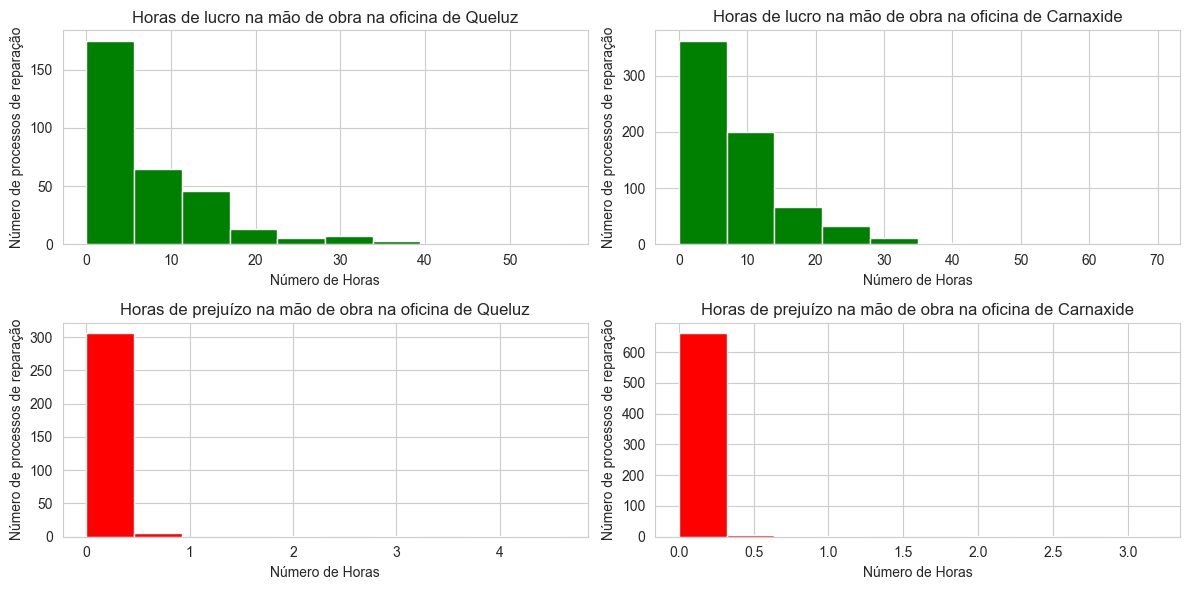

In [837]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

ax1.hist(horas_queluz['lucro_mo_total'], color="green")
ax1.set_title('Horas de lucro na mão de obra na oficina de Queluz')
ax1.set_xlabel('Número de Horas')
ax1.set_ylabel('Número de processos de reparação')
ax1.grid(True)

ax2.hist(horas_carnaxide['lucro_mo_total'], color="green")
ax2.set_title('Horas de lucro na mão de obra na oficina de Carnaxide')
ax2.set_xlabel('Número de Horas')
ax2.set_ylabel('Número de processos de reparação')
ax2.grid(True)

ax3.hist(horas_queluz['prejuizo_mo_total'], color="red")
ax3.set_title('Horas de prejuízo na mão de obra na oficina de Queluz')
ax3.set_xlabel('Número de Horas')
ax3.set_ylabel('Número de processos de reparação')
ax3.grid(True)

ax4.hist(horas_carnaxide['prejuizo_mo_total'], color="red")
ax4.set_title('Horas de prejuízo na mão de obra na oficina de Carnaxide')
ax4.set_xlabel('Número de Horas')
ax4.set_ylabel('Número de processos de reparação')
ax4.grid(True)

plt.tight_layout()
plt.show()

---

---

## 5. Análise financeira

> Voltamos a ter em conta todos veículos para reparação neste capítulo de análise

### 5.1. Penalizações por dias de atraso

In [838]:
print("No período compreendido o número total de dias de atraso foi de: {} dias.".format(dias_atraso_totais))

No período compreendido o número total de dias de atraso foi de: 299 dias.


In [839]:
print("O valor que a oficina teve que restituir à seguradora pelo total de dias de atraso foi de: {} €.".format(dias_atraso_totais * 25))

O valor que a oficina teve que restituir à seguradora pelo total de dias de atraso foi de: 7475 €.


**Nota:**

Tendo em conta que por cada dia necessário a mais do que o previsto corresponde a 25€ de penalização. Podemos concluir que a oficina teve que restituir à seguradora 7475 € pelos 299 dias que demorou a mais a realizar as reparações no período analisado.

---

### 5.2. Valor pago por hora de mão de obra em euros (seguradora)

In [840]:
oficina_df_euros = oficina_df[['marca', 'orc_mo_chapa', 'orc_mo_pintura', 'mo_horas_orc_chapa', 'mo_horas_orc_pintura' ]]
oficina_df_euros.head()

,marca,orc_mo_chapa,orc_mo_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura
id,,,,,
3647,Citroen,0.00,0.00,0.00,0.00
3536,Peugeot,0.00,0.00,0.00,0.00
635,Fiat,0.00,0.00,0.00,0.00
3766,Nissan,159.60,75.60,4.09,1.94
2675,BMW,556.24,724.82,14.26,18.59


In [841]:
oficina_df_euros.loc[:, 'valor_hora_chapa'] = oficina_df_euros['orc_mo_chapa'] / oficina_df_euros['mo_horas_orc_chapa']
oficina_df_euros.loc[:, 'valor_hora_pintura'] = oficina_df_euros['orc_mo_pintura'] / oficina_df_euros['mo_horas_orc_pintura']
oficina_df_euros.head(8)

C:\Users\Computador2\AppData\Local\Temp\ipykernel_16696\190578657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oficina_df_euros.loc[:, 'valor_hora_chapa'] = oficina_df_euros['orc_mo_chapa'] / oficina_df_euros['mo_horas_orc_chapa']
C:\Users\Computador2\AppData\Local\Temp\ipykernel_16696\190578657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oficina_df_euros.loc[:, 'valor_hora_pintura'] = oficina_df_euros['orc_mo_pintura'] / oficina_df_euros['mo_horas_orc_pintura']


,marca,orc_mo_chapa,orc_mo_pintura,mo_horas_orc_chapa,mo_horas_orc_pintura,valor_hora_chapa,valor_hora_pintura
id,,,,,,,
3647,Citroen,0.00,0.00,0.00,0.00,NaN,NaN
3536,Peugeot,0.00,0.00,0.00,0.00,NaN,NaN
635,Fiat,0.00,0.00,0.00,0.00,NaN,NaN
3766,Nissan,159.60,75.60,4.09,1.94,39.02,38.97
2675,BMW,556.24,724.82,14.26,18.59,39.01,38.99
2588,Mercedes-Benz,120.00,90.80,3.08,2.33,38.96,38.97
4127,Peugeot,195.24,130.32,5.01,3.34,38.97,39.02
4122,Peugeot,414.88,164.00,10.64,4.21,38.99,38.95


In [842]:
oficina_df_euros[['valor_hora_chapa', 'valor_hora_pintura']].describe()

,valor_hora_chapa,valor_hora_pintura
count,993.00,944.00
mean,39.00,39.00
std,0.05,0.03
min,38.41,38.84
25%,38.99,38.98
50%,39.00,39.00
75%,39.01,39.02
max,39.35,39.14


In [843]:
valor_hora_seg = 39
print("A seguradora por cada hora de mão de obra paga uma média de {} euros.".format(valor_hora_seg))

A seguradora por cada hora de mão de obra paga uma média de 39 euros.


In [844]:
#Valor total de lucros em horas já calculado em 4.2.5.
print("O número de horas de lucro na mão de obra total que a oficina teve ao longo deste período foi de cerca de {} horas.".format(int(lucros_mo_total_ano)))

O número de horas de lucro na mão de obra total que a oficina teve ao longo deste período foi de cerca de 8191 horas.


In [845]:
valor_lucros_mo_total = int(lucros_mo_total_ano) * 39
print("A oficina no período compreendido conseguiu um ganho de {} euros, em termos de valor em horas de mão de obra que foram pagos pela seguradora e que não foram necessários realizar pelos profissionais da oficina.".format(valor_lucros_mo_total))

A oficina no período compreendido conseguiu um ganho de 319449 euros, em termos de valor em horas de mão de obra que foram pagos pela seguradora e que não foram necessários realizar pelos profissionais da oficina.


**Conclusões:**

O valor que a seguradora paga à hora de mão de obra é de 39 euros.

No período compreendido, se tivermos em conta o número de horas de lucro (horas orçamentadas que não se traduziram em horas reais de reparação), a oficina recebeu 319.449 euros dos quais não teve despesa associada, de ganho direto. Isto em termos de mão de obra, fruto de uma maior eficiência dos profissionais e gestão interna da oficina.

Para calcularmos os ganhos totais da oficina ao longo deste período teriamos que ter em conta os lucros resultantes da compra e venda de peças e materiais, lucros de valor pago por hora aos profissionais (10,5€) relativamente ao pago pela seguradora (39€), entre outros.

---

---

## 6. Correlações

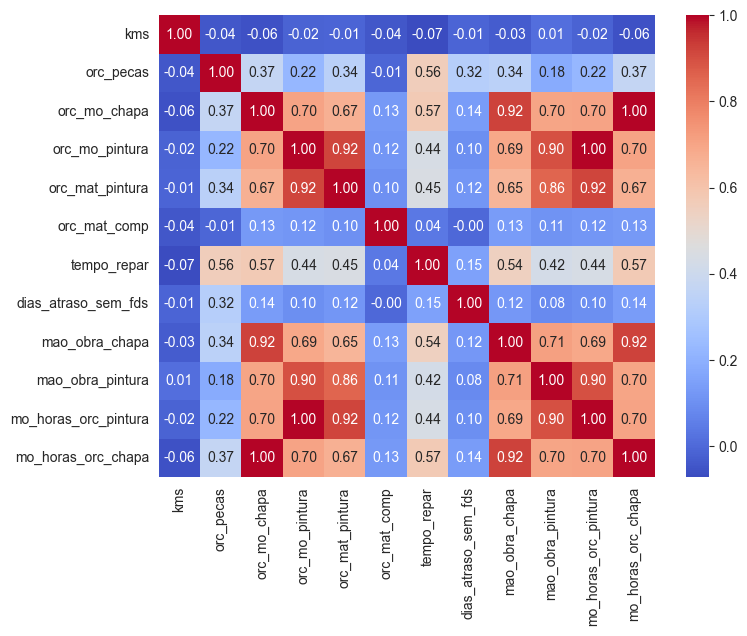

In [846]:
oficina_df_corr = oficina_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(oficina_df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

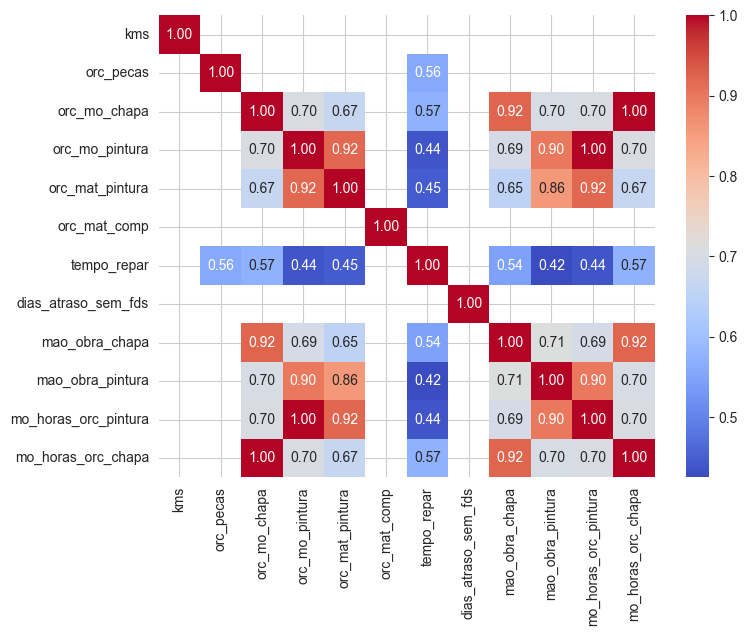

In [847]:
#Vou selecionar apenas as correlações superiores a abs(0.6)
mask1 = oficina_df_corr.abs() > 0.4

# Aplicar a máscara para manter apenas os valores de correlação que atendem à condição
oficina_df_corr_selected = oficina_df_corr[mask1]

plt.figure(figsize=(8, 6))
sns.heatmap(oficina_df_corr_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Pelo heatmap podemos tirar algumas conclusões e ao mesmo tempo validar já algumas pressunções que fomos fazendo ao longo da análise. Entre elas:

* As correlações entre as variáveis do nosso dataset são quase todas elas positivas.

* Temos algumas variáveis com indíces de correlações entre elas iguais a um (ou seja, tem comportamentos exatamente iguais), nomeadamente 'mo_horas_orc_chapa' com 'orc_mo_chapa', 'mo_horas_orc_pintura' com 'orc_mo_pintura'. Isto era espectável, uma vez que o valor em euros orçamentado resulta do valor em horas orçamentado, uma é calculada a partir da outra.

* Temos variáveis com correlações muito elevadas (> 0.8), nomeadamente:
    1. 'orc_mo_chapa' com 'mao_obra_chapa'
    2. 'orc_mo_pintura' com 'orc_mat_pintura' e 'mao_obra_pintura'
    3. 'orc_mat_pintura' com 'mo_horas_orc_pintura' e 'mao_obra_pintura
    4. 'mao_obra_chapa' com 'mo_horas_orc_chapa'
    5. 'mao_obra_pintura' com 'mo_horas_orc_pintura'
 
* As conclusões anteriores todas elas eram espectáveis. Isto porque é de esperar uma relação forte entre:
    * o valor orçamentado em euros para um trabalho está relacionado com o número de horas efetivamente necessárias (ponto 1, e 2), este valor de correlação é ligeiramente menor que 1 daí haver os ganhos que falamos de eficiência da oficina;
    * o valor orçamentado em euros para um trabalho e o valor do material que necessitamos para o fazer (ponto 2);
    * o valor orçamentado para o material que vamos necessitar para o trabalho e o número de horas de trabalho previsto para o concluir, bem como o valor de horas que efetivamente é necessário para o fazer (ponto 3), isto porque normalmente trabalhos mais longos necessitam de mais material, e vice-versa;
    * o número de horas previstas para o trabalho e o número de horas que realmente necessário para o trabalho ser realizado (ponto 4 e 5), este valor de correlação é ligeiramente menor que 1 daí haver os ganhos que falamos de eficiência da oficina.

* Dentro das conclusões de correlações elevadas temos ainda relações marcadas (entre 0.67 e 0.7) entre os trabalhos de chapa e pintura, e consequentemente com o seu orçamento em termos de valores em euros, horas previstas e reais. Isto acontece porque normalmente quando há um acidente o veículo fica com necessidades de reparações tanto na sua chapa como na sua pintura, por exemplo se 'amolgamos' a chapa de um veículo, a sua pintura nessa zona de certo foi afetada.

* Importante ainda referir que efetivamente há uma correlação moderada (entre 0.44 e 0.57) entre o tempo total de reparação e os tempos necessários para realizar cada uma das suas componentes.
    * Estes valores sugerem que as horas orçamentadas para uma reparação não estão de acordo com a realidade desta oficina, daí os ganhos que falamos, ou se quisermos ver por outro prisma, a oficina demonstra uma elevada eficiência no trabalho em relação à média esperada pela seguradora.
    * Contudo seria de esperar uma relação mais forte entre o tempo de reparação e o número de horas que cada trabalho de mão de obra efetivamente demorou. Podemos aferir que o tempo de reparação tem mais variáveis a ter em conta do que apenas o tempo de mão de obra necessário, como por exemplo, o volume de trabalho na oficina, gestão de tempos, etc.

In [848]:
oficina_df_corr_maior.loc[:, 'oficina'] = oficina_df['oficina'].copy()
oficina_df_corr_maior.head()

,orc_mo_chapa,mao_obra_chapa,orc_mo_pintura,orc_mat_pintura,mao_obra_pintura,mo_horas_orc_pintura,mo_horas_orc_chapa,oficina
id,,,,,,,,
3647,0.00,2.50,0.00,0.00,2.00,0.00,0.00,Carnaxide
3536,0.00,4.00,0.00,0.00,5.00,0.00,0.00,Carnaxide
635,0.00,0.00,0.00,0.00,2.00,0.00,0.00,Carnaxide
3766,159.60,0.00,75.60,18.00,2.00,1.94,4.09,Queluz
2675,556.24,6.00,724.82,414.34,12.00,18.59,14.26,Queluz


<Figure size 600x400 with 0 Axes>

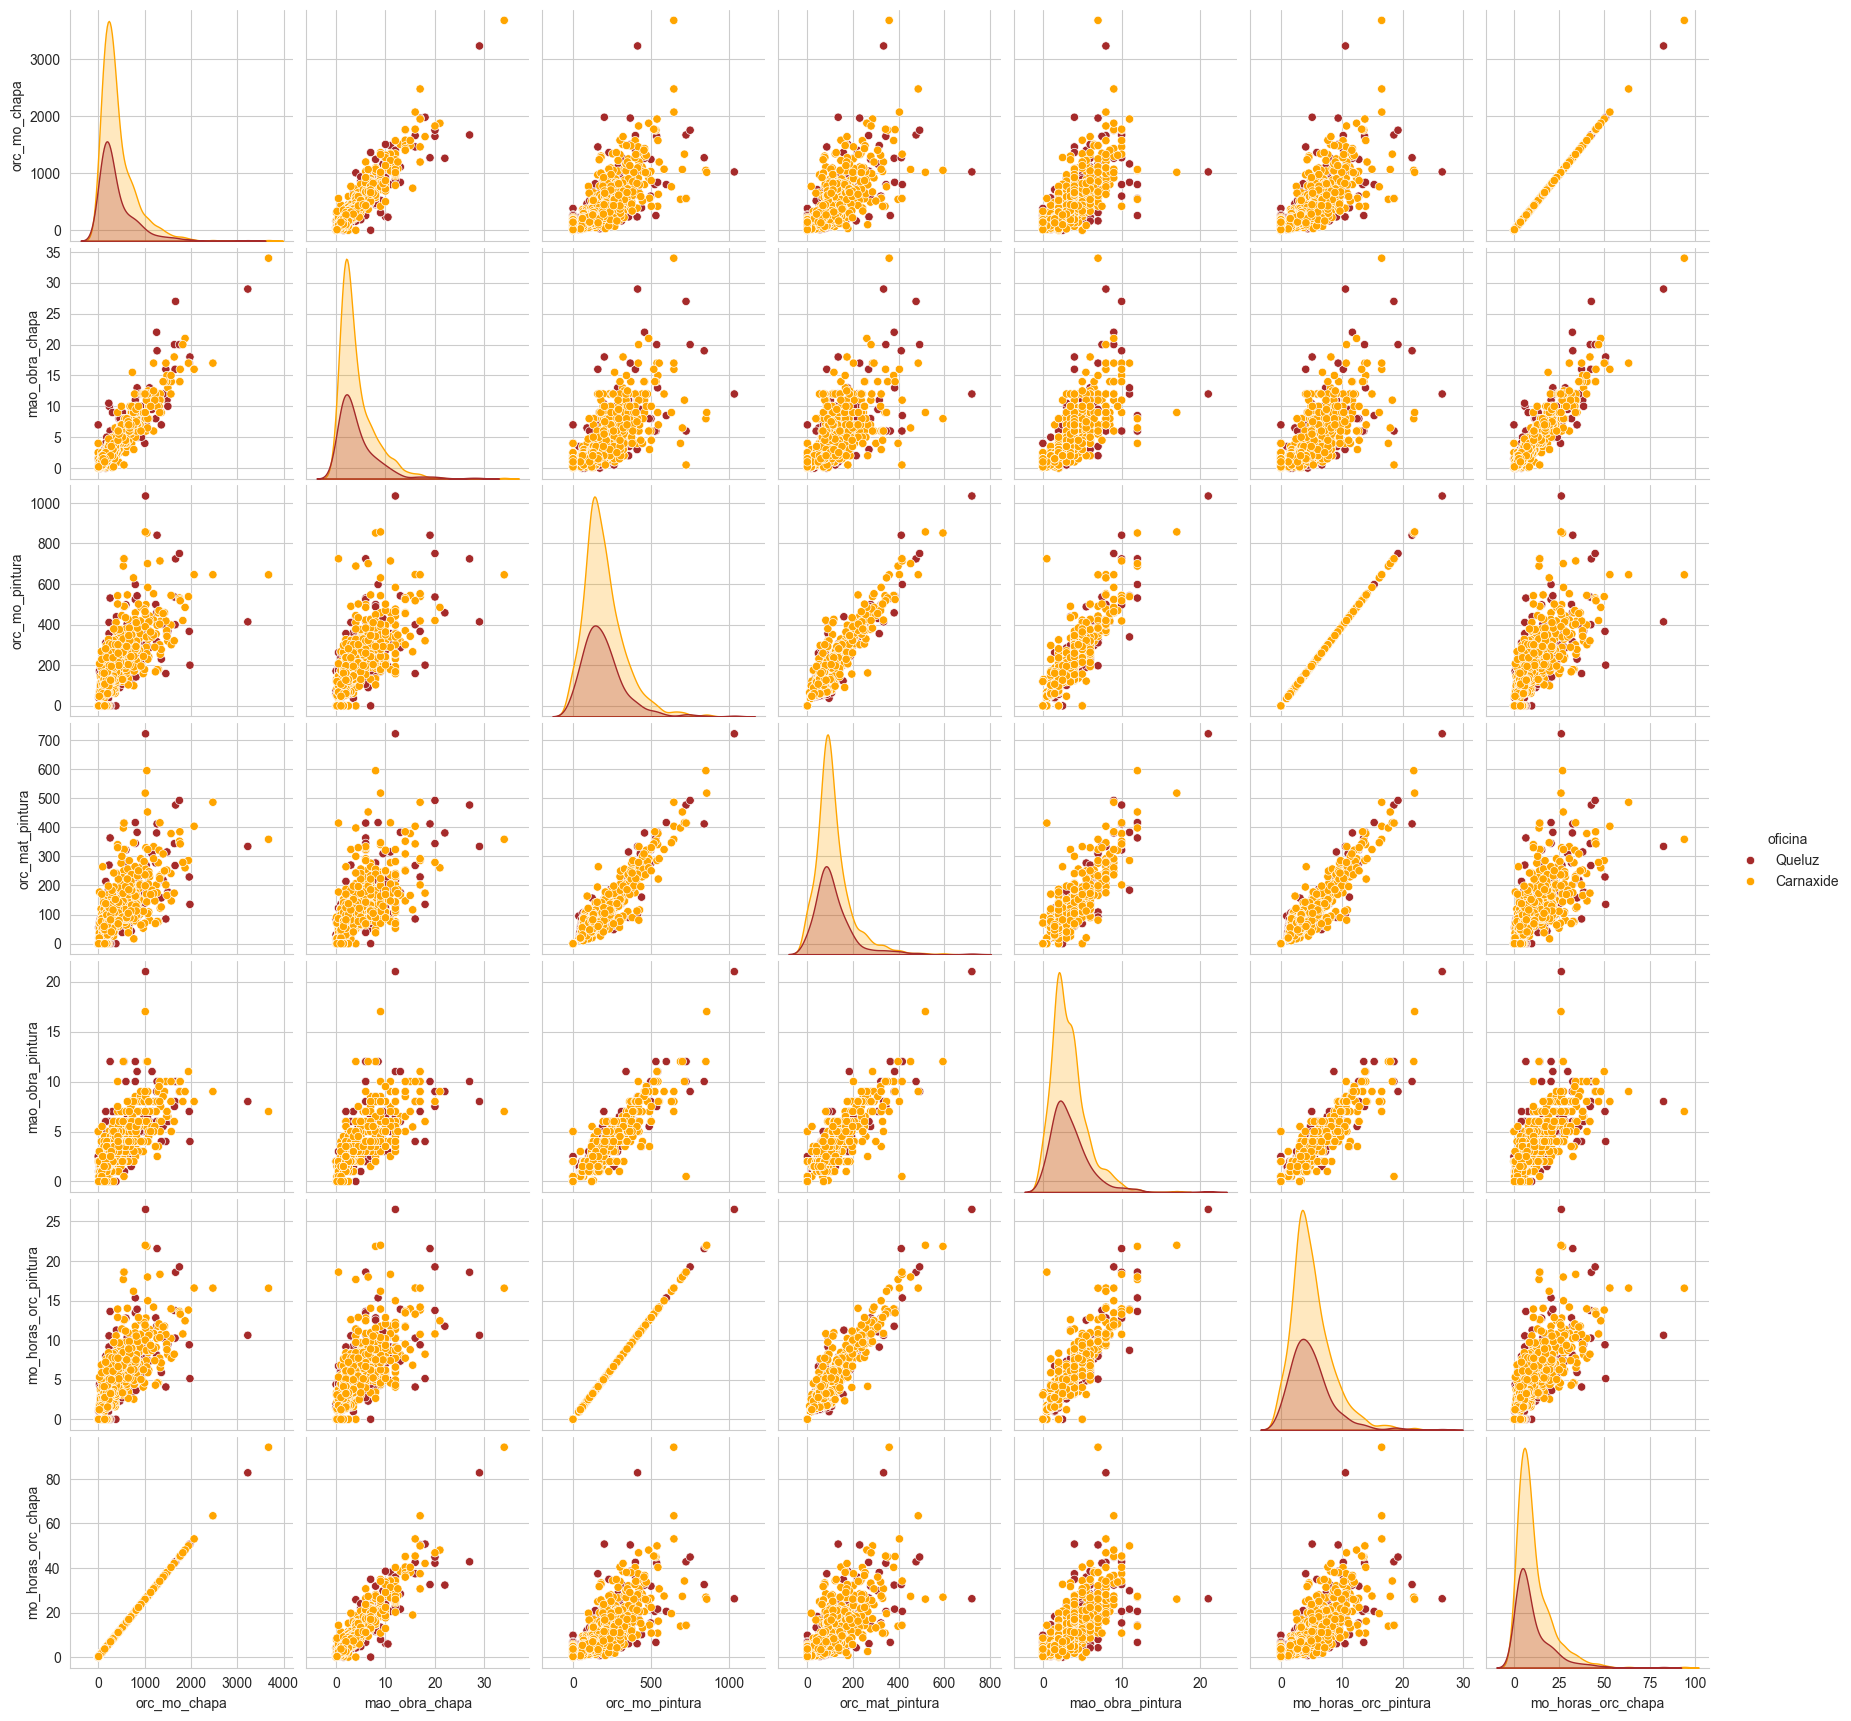

In [849]:
# Pairplot das variáveis com correlações maiores diferentes de 1, por oficinas
oficina_df_queluz = oficina_df_corr_maior[oficina_df_corr_maior['oficina'] == 'Queluz']
oficina_df_carnaxide = oficina_df_corr_maior[oficina_df_corr_maior['oficina'] == 'Carnaxide']

cores_oficinas = {'Queluz': 'brown', 'Carnaxide': 'orange'}

plt.figure(figsize=(6, 4))
sns.pairplot(data=pd.concat([oficina_df_queluz, oficina_df_carnaxide]), hue='oficina', palette=cores_oficinas)
plt.show()

> Haveria certamente muito mais análise a fazer...